# Health data :

We were supposed to:

1 - Clean each dataset
2 - Adjusting the offset UTC time, if it's applicable
3 - Provide separate analysis of each dataset
4 - Do further analysis, provide meaningful relations and make a model
5 - Show some of the graphs online using plotly and GCP (as It's a web app with .py python extention provided as another project in plotly-dash folder) which is the code uploaded on my website: www.farhad-sadeghlo.com, more information is on my LinkedIn

In [1]:
import pandas as pd
pd.reset_option("^display")
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from pytz import all_timezones
import datetime
from datetime import datetime, date
import math

from datetime import *
from dateutil.tz import *
import arrow
import dateutil
from pytz import timezone
from dateutil import parser

# <font color=blue> Sleep </font>

In [3]:
# saving the sleep data as pandas dataframe
sleep = pd.read_csv('./sleep.csv', encoding = 'latin_1')

# renaming columns to smaller names
sleep.rename(columns = {'com.samsung.health.sleep.datauuid':'sleep_datauuid',\
                            'com.samsung.health.sleep.end_time':'sleep_end_time',\
                           'com.samsung.health.sleep.start_time':'sleep_start_time',\
                           'com.samsung.health.sleep.time_offset':'sleep_time_offset',\
                           'com.samsung.health.sleep.deviceuuid':'sleep_deviceuuid',\
                           'com.samsung.health.sleep.update_time':'sleep_update_time',\
                           'com.samsung.health.sleep.create_time':'sleep_create_time',\
                           'com.samsung.health.sleep.time_offset':'sleep_time_offset',\
                           'com.samsung.health.sleep.pkg_name':'sleep_pkg_name',\
                                                  'efficiency':'sleep_efficiency',\
                                         'original_efficiency':'sleep_original_efficiency',\
                                           'original_bed_time':'sleep_original_bed_time',\
                                                     'quality':'sleep_quality',\
                                              'has_sleep_data':'sleep_has_sleep_data',\
                                                  'extra_data':'sleep_extra_data'}, inplace=True)

# First of all taking care of UTC
sleeputcH = divmod(pd.to_numeric(sleep['sleep_time_offset'].apply(lambda x: x[-5:])), 100)[0]
sleeputcM = divmod(pd.to_numeric(sleep['sleep_time_offset'].apply(lambda x: x[-5:])), 100)[1]
sleeputc = sleeputcH * 3600 * 1000 + sleeputcM * 60 * 1000
sleep['sleep_start_time'] = sleep['sleep_start_time'] + sleeputc
sleep['sleep_end_time'] = sleep['sleep_end_time'] + sleeputc
sleep['sleep_update_time'] = sleep['sleep_update_time'] + sleeputc
sleep['sleep_create_time'] = sleep['sleep_create_time'] + sleeputc

# converting long numbers as times '1520516398387' to normal date and time format



# converting 'com.samsung.health.sleep.end_time' datetimes to normal ones
samsung_e_f = pd.DataFrame(pd.to_datetime(sleep['sleep_end_time'], unit='ms'))
# replacing the converted datetimes with the current one in the table
sleep['sleep_end_time'] = samsung_e_f['sleep_end_time'].values

# converting 'com.samsung.health.sleep.start_time' datetimes to normal ones
# samsung_wt_f = pd.DataFrame(pd.to_datetime(sleep['original_wake_up_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
# sleep['original_wake_up_time'] = samsung_wt_f['original_wake_up_time'].values

# converting 'com.samsung.health.sleep.start_time' datetimes to normal ones
samsung_starttime_f = pd.DataFrame(pd.to_datetime(sleep['sleep_start_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
sleep['sleep_start_time'] = samsung_starttime_f['sleep_start_time'].values

# converting 'com.samsung.health.sleep.start_time' datetimes to normal ones
samsung_ut_f = pd.DataFrame(pd.to_datetime(sleep['sleep_update_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
sleep['sleep_update_time'] = samsung_ut_f['sleep_update_time'].values

# converting 'com.samsung.health.sleep.start_time' datetimes to normal ones
samsung_ct_f = pd.DataFrame(pd.to_datetime(sleep['sleep_create_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
sleep['sleep_create_time'] = samsung_ct_f['sleep_create_time'].values

# define the times then sort it here
import datetime
sleep['sleep_end_time'] = pd.to_datetime(sleep['sleep_end_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
sleep['sleep_start_time'] = pd.to_datetime(sleep['sleep_start_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
sleep['sleep_update_time'] = pd.to_datetime(sleep['sleep_update_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
sleep['sleep_create_time'] = pd.to_datetime(sleep['sleep_create_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

# sorting sleep according to 'com.samsung.health.sleep.start_time'
sleep_s = sleep.sort_values(by = 'sleep_start_time')
sleep_s.reset_index(drop = True, inplace = True)
sleep_s_f = sleep_s.drop(['Unnamed: 0','com.samsung.health.sleep.custom','com.samsung.health.sleep.comment'], axis = 1)
sleep_s_f_sleep_dur = (sleep_s_f['sleep_end_time'] - sleep_s_f['sleep_start_time']).astype('timedelta64')
sleep_s_f = sleep_s_f.assign(sleep_dur = sleep_s_f_sleep_dur)
sleep_s_f['sleep_dur'] = pd.to_datetime(sleep_s_f['sleep_dur'], format='%Y-%m-%d %H:%M:%S', utc=False)
# sleep_s_f['sleep_dur'] = pd.Series([val.time() for val in sleep_s_f['sleep_dur']])



sleep_s_f = sleep_s_f.fillna(0)
sleep_s_f['sleep_day_name'] = sleep_s_f['sleep_start_time'].dt.weekday_name
sleep_s_f['sleep_hour'] = sleep_s_f['sleep_dur'].dt.round("H").dt.hour
sleep_s_f['sleep_week_n'] = sleep_s_f['sleep_start_time'].dt.week

base=5
def mydivmod(x):
    if divmod(x,base)[1] >= base/2:
        return divmod(x,base)[0]*base + base
    elif divmod(x,base)[1] < base/2:
        return divmod(x,base)[0]*base

sleep_s_f['sleep_efficiency_rounded'] = sleep_s_f['sleep_efficiency'].apply(mydivmod)
sleep_s_f.head()


,sleep_efficiency,sleep_extra_data,sleep_has_sleep_data,sleep_datauuid,sleep_quality,sleep_end_time,original_wake_up_time,sleep_start_time,sleep_time_offset,sleep_deviceuuid,sleep_update_time,sleep_original_bed_time,sleep_create_time,sleep_pkg_name,sleep_original_efficiency,sleep_dur,sleep_day_name,sleep_hour,sleep_week_n,sleep_efficiency_rounded
0,94.902916,0.0,1.0,1d4fb447-0895-51fb-9ce9-d087a50674c0,0.0,2017-12-16 06:53:00,0,2017-12-16 00:02:00,UTC-0500,F/D7+hL5E5,2017-12-16 07:08:04.768,0,2017-12-16 07:08:04.768,com.sec.android.app.shealth,0.0,1970-01-01 06:51:00,Saturday,7,50,95.0
1,96.341460,0.0,1.0,9910f6c6-236f-dc17-b27f-c45497588ebe,0.0,2017-12-18 06:42:00,0,2017-12-17 22:31:00,UTC-0500,F/D7+hL5E5,2017-12-18 06:57:19.246,0,2017-12-18 06:57:19.246,com.sec.android.app.shealth,0.0,1970-01-01 08:11:00,Sunday,8,50,95.0
2,93.174065,0.0,1.0,2722f3f3-63af-910f-f032-28729fb8151f,0.0,2017-12-20 03:48:00,0,2017-12-19 22:55:00,UTC-0500,F/D7+hL5E5,2017-12-20 03:57:23.977,0,2017-12-20 03:57:23.977,com.sec.android.app.shealth,0.0,1970-01-01 04:53:00,Tuesday,5,51,95.0
3,91.434265,0.0,1.0,6a6039c7-88c4-ea1a-8fe8-7906c6143032,0.0,2017-12-22 09:18:00,0,2017-12-22 00:57:00,UTC-0800,F/D7+hL5E5,2017-12-22 09:33:23.295,0,2017-12-22 09:33:23.295,com.sec.android.app.shealth,0.0,1970-01-01 08:21:00,Friday,8,51,90.0
4,93.188850,0.0,1.0,93405262-d282-f3a6-f4a9-4ea1a6ad946f,0.0,2017-12-23 07:10:00,0,2017-12-23 01:48:00,UTC-0800,F/D7+hL5E5,2017-12-23 07:25:03.272,0,2017-12-23 07:25:03.272,com.sec.android.app.shealth,0.0,1970-01-01 05:22:00,Saturday,5,51,95.0


In [4]:
sleep_s_f.sleep_week_n.unique()

array([50, 51, 52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49])

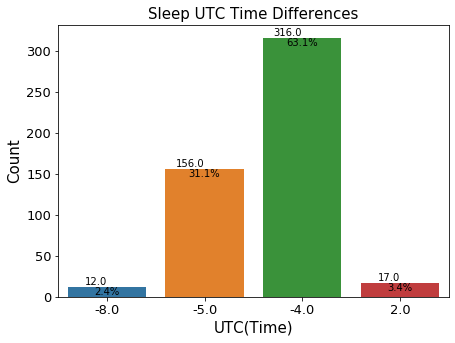

In [5]:
sleep_utc = pd.to_numeric(sleep['sleep_time_offset'].apply(lambda x: x[-5:]))/100
plt.figure(figsize=(7,5))
ax1 = sns.countplot(x=sleep_utc.index, data=sleep_utc)
ncount = len(sleep_utc)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Sleep UTC Time Differences',fontsize = 15)
plt.xlabel('UTC(Time)',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [6]:
sleep_utc.unique()

array([-4., -5., -8.,  2.])

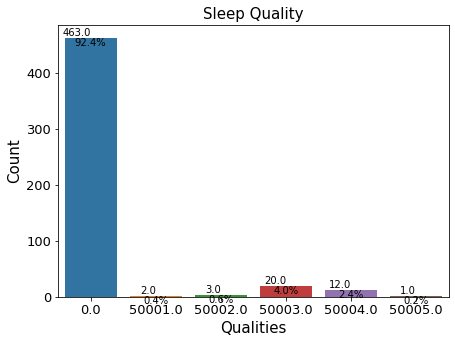

In [7]:
plt.figure(figsize=(7,5))
ax1 = sns.countplot(x=sleep_s_f.index, data=sleep_s_f['sleep_quality'])
ncount = len(sleep_s_f)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Sleep Quality',fontsize = 15)
plt.xlabel('Qualities',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

/Users/eatthis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/eatthis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


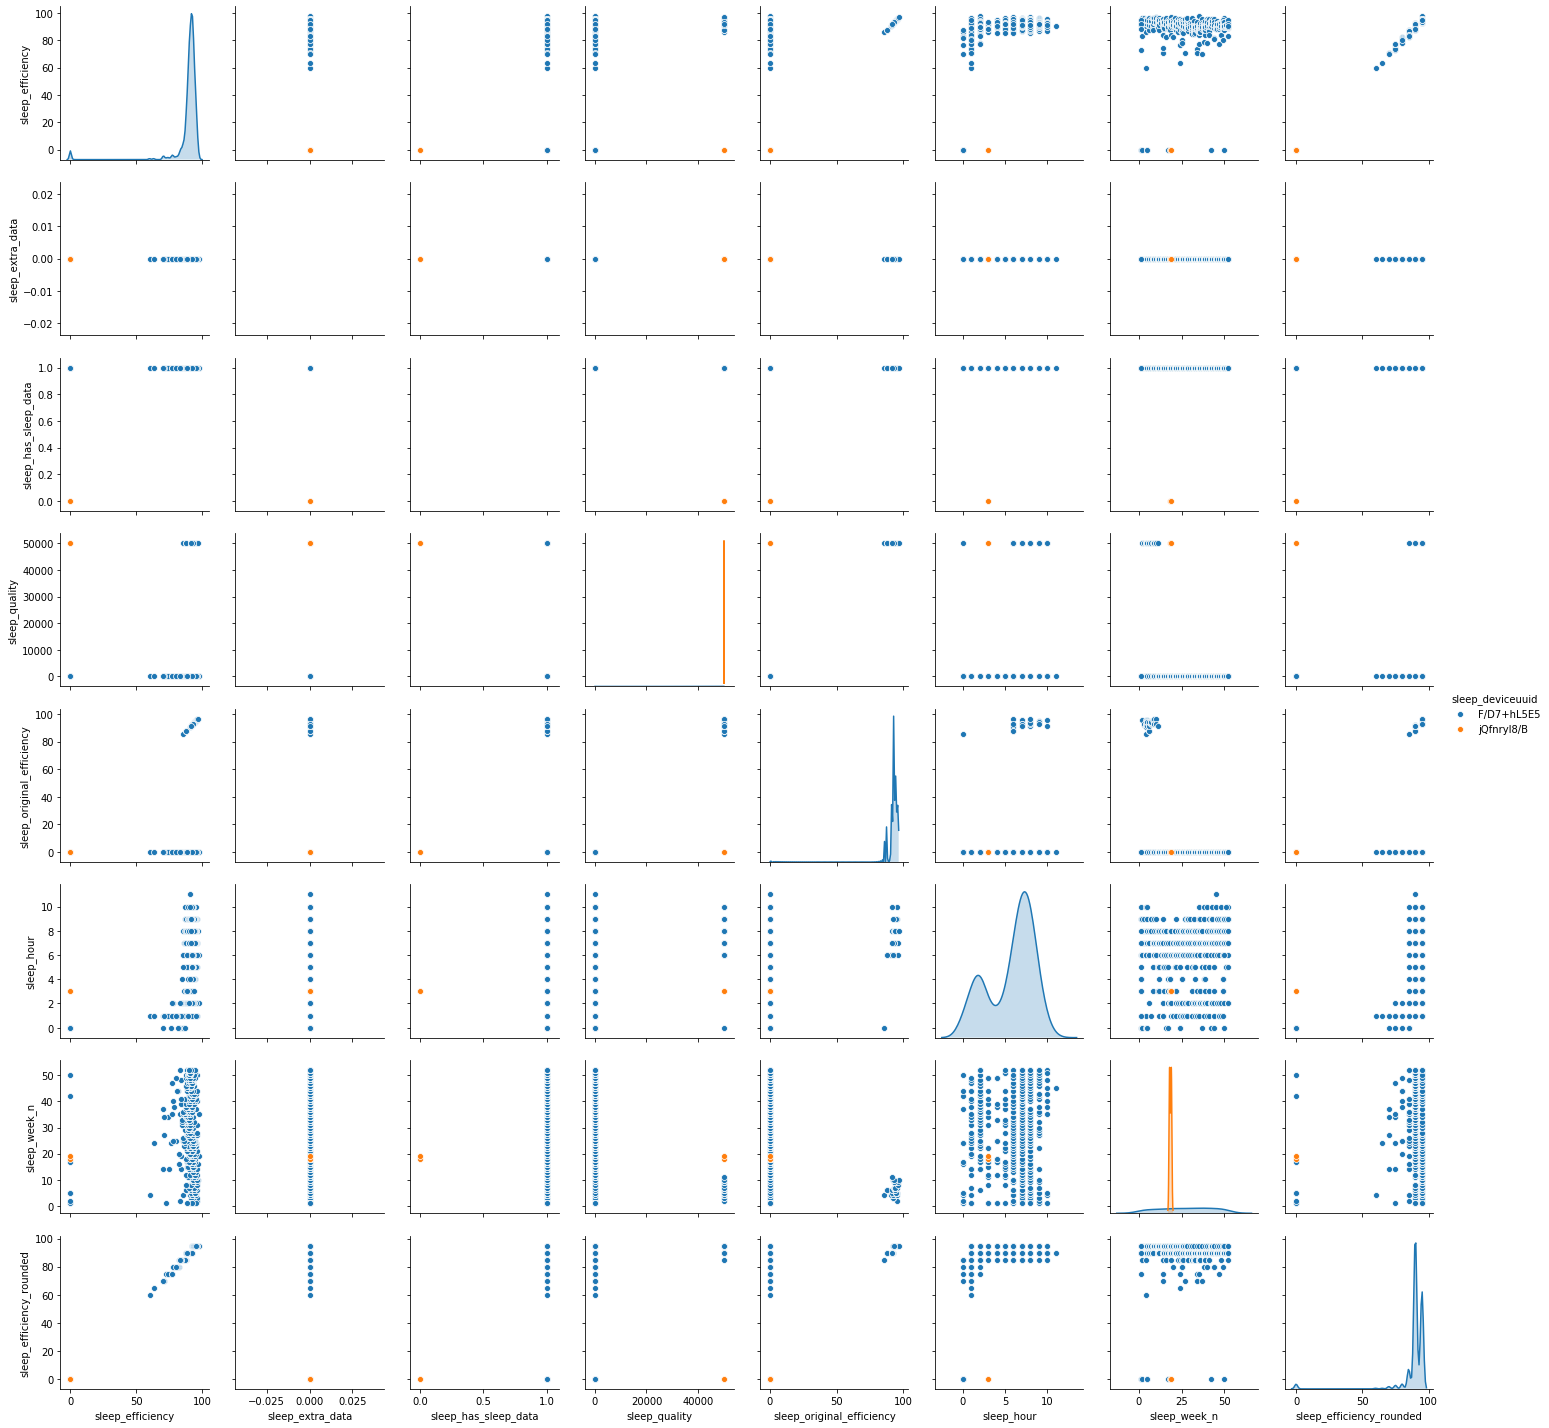

In [8]:
sns.pairplot(hue = 'sleep_deviceuuid', data = sleep_s_f)


In [9]:
# from datetime import datetime
# from pytz import timezone
# sleep['com.samsung.health.sleep.start_time'] = pd.to_datetime(sleep['com.samsung.health.sleep.start_time'].astimezone(timezone('US/Pacific')))

# # sleep['com.samsung.health.sleep.start_time'] = pd.to_datetime(sleep['com.samsung.health.sleep.start_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=True)
# sleep_s_f


In [10]:
sleep_s_f_table1=sleep_s_f.groupby(['sleep_day_name']).describe()
sleep_s_f_table1

sleep_efficiency                                                                             sleep_extra_data                                    sleep_has_sleep_data                                              sleep_quality                                                         sleep_original_efficiency                                                      sleep_hour                                                sleep_week_n                                                      sleep_efficiency_rounded                                                    
                          count       mean        std       min        25%        50%        75%        max            count mean  std  min  25%  50%  75%  max                count      mean       std  min  25%  50%  75%  max         count         mean           std  min  25%  50%  75%      max                     count       mean        std  min  25%  50%  75%        max      count      mean       std  min   25%  50%  75%   max        count       mean        std  min    25%   50%    75%   max                    count       mean        std   min   25%   50%   75%   max
sleep_day_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
Friday                     67.0  91.886191   3.423954  70.27027  90.490320  92.109770  93.481510  97.391304             67.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                 67.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0          67.0  3731.582090  13239.429645  0.0  0.0  0.0  0.0  50004.0                      67.0   6.995853  24.826993  0.0  0.0  0.0  0.0  96.363630       67.0  6.358209  2.586102  0.0  5.50  7.0  8.0  10.0         67.0  28.850746  15.071802  1.0  16.50  28.0  42.00  52.0                     67.0  91.940299   3.789461  70.0  90.0  90.0  95.0  95.0
Monday                     70.0  88.019358  15.976280   0.00000  89.533336  91.390830  93.069163  95.730330             70.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                 70.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0          70.0  2857.342857  11690.384675  0.0  0.0  0.0  0.0  50004.0                      70.0   5.379909  22.012319  0.0  0.0  0.0  0.0  95.475110       70.0  6.114286  2.452700  0.0  5.25  7.0  8.0  10.0         70.0  25.442857  15.644266  1.0  12.25  26.0  37.75  52.0                     70.0  88.000000  16.047935   0.0  90.0  90.0  95.0  95.0
Saturday                   73.0  88.291051  15.502064   0.00000  89.322380  92.008640  93.177734  95.945946             73.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                 73.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0          73.0  5479.794521  15727.914534  0.0  0.0  0.0  0.0  50004.0                      73.0  10.086119  28.961302  0.0  0.0  0.0  0.0  94.291756       73.0  5.013699  3.088928  0.0  2.00  6.0  8.0  10.0         73.0  29.287671  15.450170  1.0  17.00  29.0  43.00  52.0                     73.0  88.561644  15.689687   0.0  90.0  90.0  95.0  95.0
Sunday                     87.0  87.537256  14.519769   0.00000  88.020090  90.521330  92.366125  96.551720             87.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                 87.0  0.988506  0.107211  0.0  1.0  1.0  1.0  1.0          87.0  2298.988506  10533.101063  0.0  0.0  0.0  0.0  50004.0                      87.0   3.269782  17.403095  0.0  0.0  0.0  0.0  95.979900       87.0  5.333333  2.705149  0.0  2.00  6.0  7.0  10.0         87.0  27.954023  14.747414  1.0  15.50  30.0  39.00  52.0                     87.0  87.528736  14.424494   0.0  90.0  

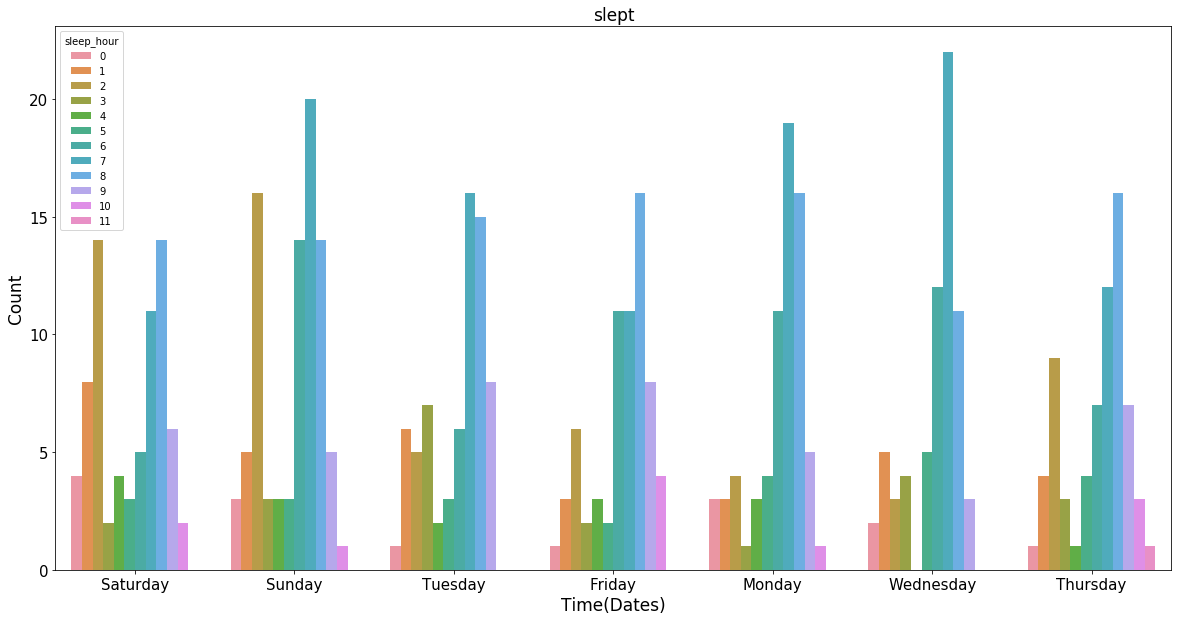

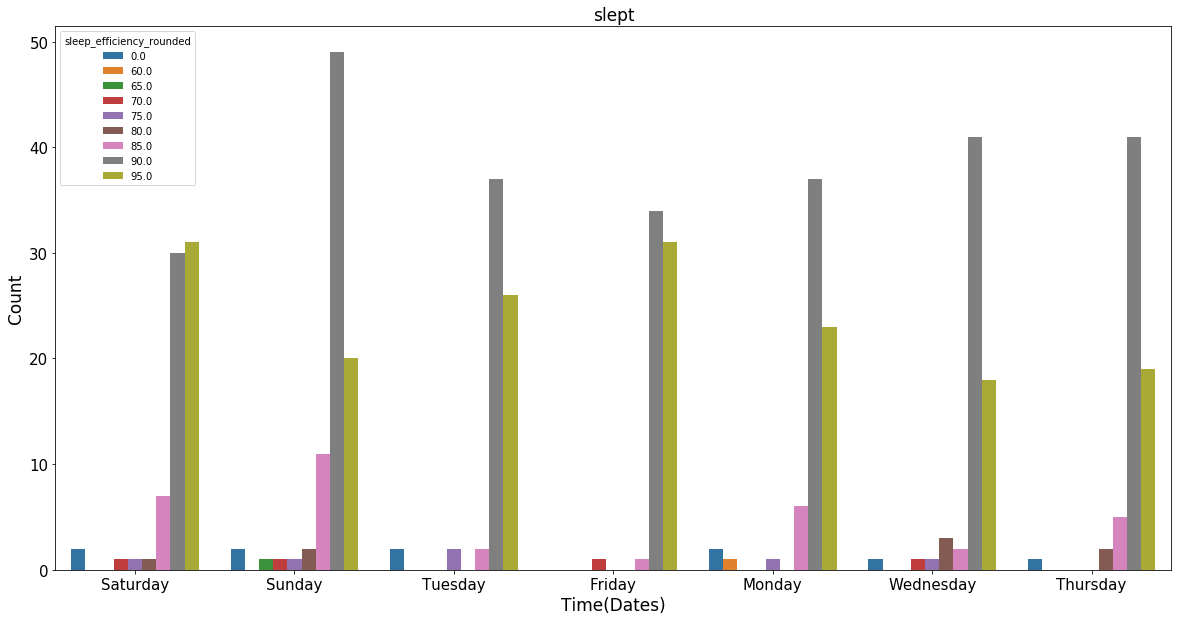

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x ='sleep_day_name', hue='sleep_hour', data=sleep_s_f)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('slept',fontsize = 17)
plt.xlabel('Time(Dates)',fontsize = 17)
plt.ylabel('Count',fontsize = 17)
plt.show()


plt.figure(figsize=(20,10))
sns.countplot(x ='sleep_day_name', hue='sleep_efficiency_rounded', data=sleep_s_f)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('slept',fontsize = 17)
plt.xlabel('Time(Dates)',fontsize = 17)
plt.ylabel('Count',fontsize = 17)
plt.show()

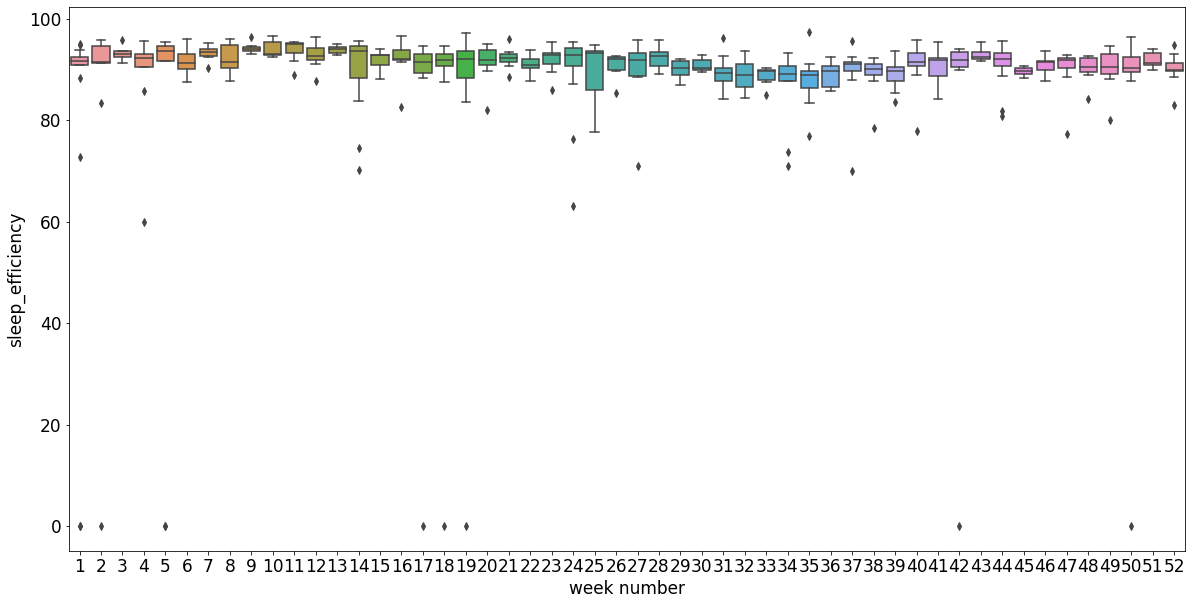

In [12]:
plt.figure(figsize=(20,10))
# sns.heatmap(sleep_e_s_f[['Sched','Hours']])
sns.boxplot(x=sleep_s_f['sleep_week_n'], y=sleep_s_f.sleep_efficiency, data=sleep_s_f)
plt.xlabel('week number',fontsize=17)
plt.ylabel('sleep_efficiency',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

According to the first figure, Accordingly as the one's sleep in minutes has increased, its sleep efficiecy has increased too. According to the second figure, but, the user has slept less than previous days in average.

In [13]:
# defining a function for regression plot of those figures that don't need sneaky tricks
def regressionplot(xx,yy):
    xx_mean = np.mean(xx)
    yy_mean = np.mean(yy)
    
    num = 0
    den = 0
    
    for i in range(len(xx)):
        num += (xx[i] - xx_mean)*(yy[i] - yy_mean)
        den += (xx[i] - xx_mean)**2
    m = num / den
    c = yy_mean - m*xx_mean
    print (m, c)
    
    # Making predictions
    yy_pred = m*xx + c
    
    # plotting the mean and regression
    plt.figure(figsize=(20,10))
    plt.plot([min(xx), max(xx)], [min(yy_pred), max(yy_pred)], color='red')

0.032331354646853085 77.67020233726892


<Figure size 1440x720 with 0 Axes>

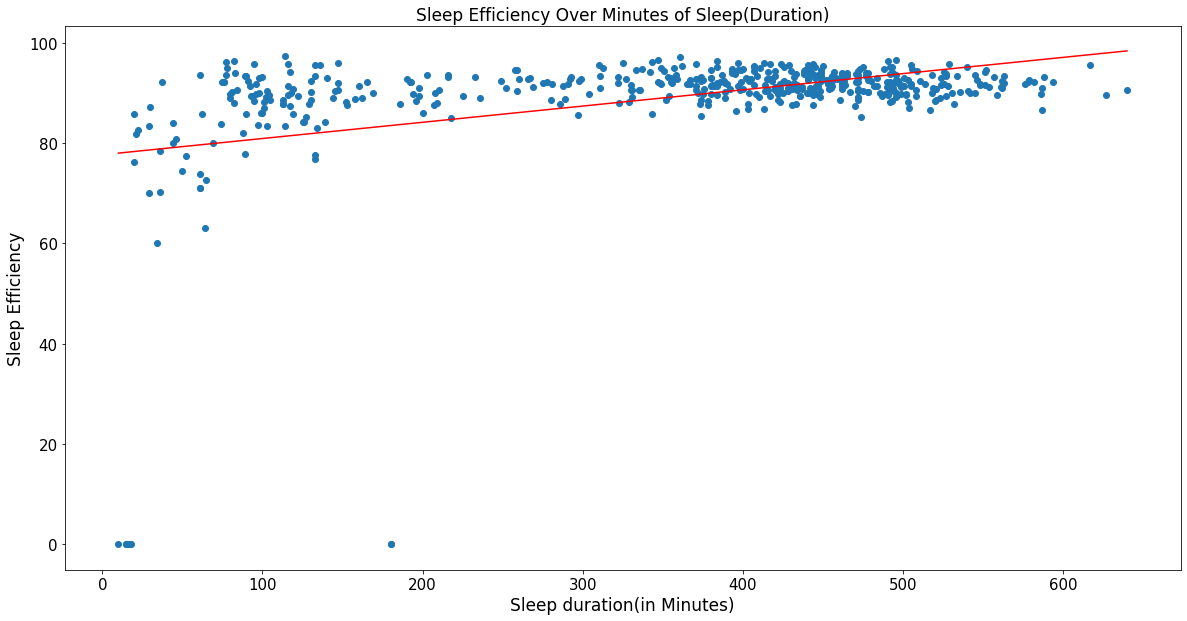

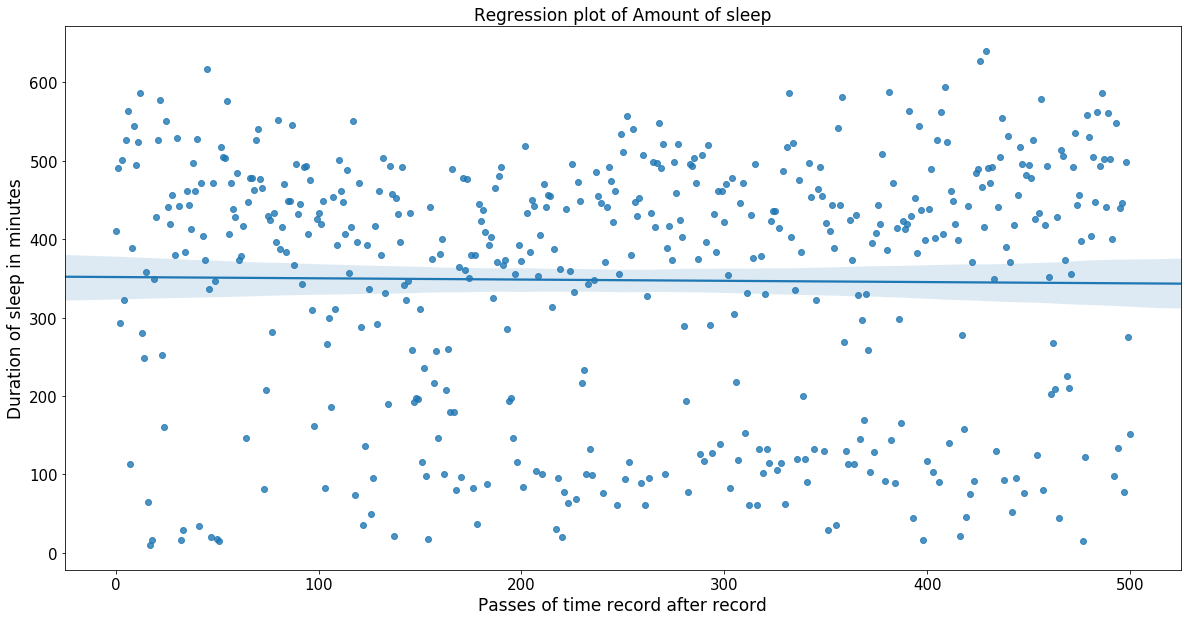

In [14]:
Goodsleep = []

Goodsleep1 = (sleep_s_f["sleep_dur"].apply(lambda x: x.hour)*60) + sleep_s_f["sleep_dur"].apply(lambda x: x.minute)
Goodsleep = np.append(Goodsleep,(sleep_s_f.sleep_efficiency))

plt.figure(figsize=(20,10))
plt.scatter(Goodsleep1,Goodsleep,regressionplot(Goodsleep1,Goodsleep))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sleep Efficiency Over Minutes of Sleep(Duration)',fontsize = 17)
plt.xlabel('Sleep duration(in Minutes)',fontsize = 17)
plt.ylabel('Sleep Efficiency',fontsize = 17)
plt.show()

plt.figure(figsize=(20,10))
sns.regplot(x=Goodsleep1.index.values, y=Goodsleep1.values,data=Goodsleep,fit_reg=True,scatter=True)
plt.title('Regression plot of Amount of sleep',fontsize = 17)
plt.xlabel('Passes of time record after record',fontsize = 17)
plt.ylabel('Duration of sleep in minutes',fontsize = 17)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()


Accordingly, our friend is probably a couch potato person who goes to bed late and wakes up late too, also the one has a lot desire to sleep more than 6 hours, to some extent he has lack of sleep one or two hours per day.
By studying its heart rate and exer in the future we would understand more about it.

<Figure size 432x288 with 0 Axes>

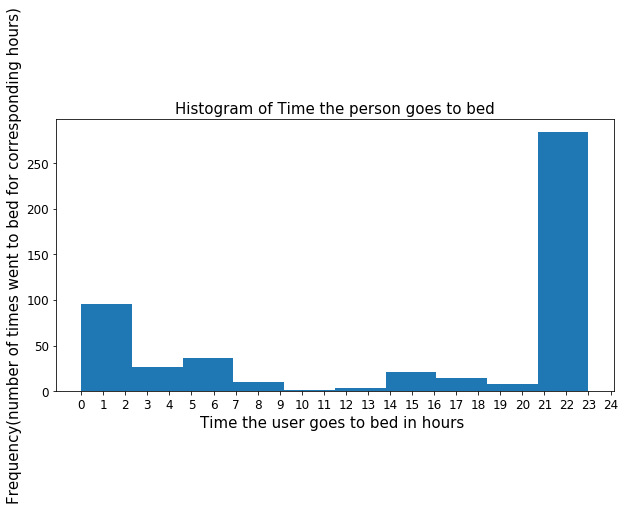

<Figure size 432x288 with 0 Axes>

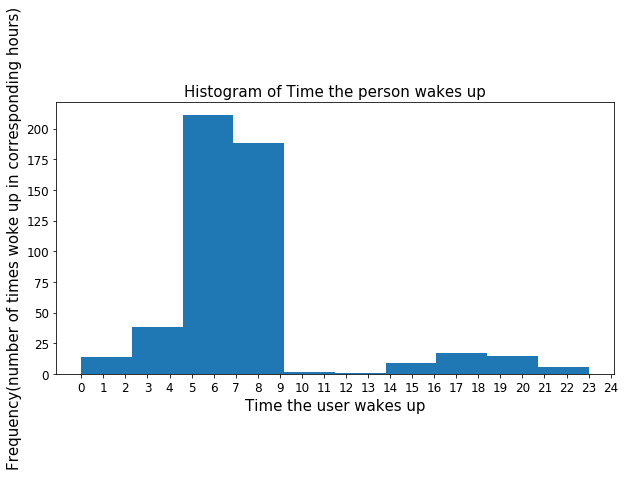

<Figure size 432x288 with 0 Axes>

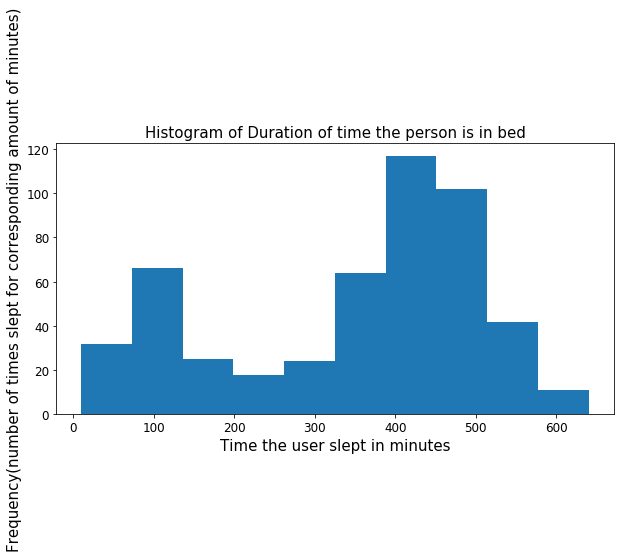

In [15]:
sleep_starting_time = sleep_s_f['sleep_start_time'].dropna(axis=0)
sleep_ending_time = sleep_s_f['sleep_end_time'].dropna(axis=0)

numbers=range(0,499)

plt.figure(1)
plt.figure(figsize=(10,5))
plt.xticks(numbers, fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0,10)
plt.hist(sleep_starting_time.dt.round('H').dt.hour)
plt.title('Histogram of Time the person goes to bed',fontsize = 15)
plt.ylabel('Frequency(number of times went to bed for corresponding hours)',fontsize = 15)
plt.xlabel('Time the user goes to bed in hours ',fontsize = 15)
plt.show()

plt.figure(2)
plt.figure(figsize=(10,5))
plt.xticks(numbers, fontsize = 12)
plt.yticks(fontsize = 12)
# plt.xlim(0,10)
plt.hist(sleep_ending_time.dt.round('H').dt.hour)
plt.title('Histogram of Time the person wakes up',fontsize = 15)
plt.ylabel('Frequency(number of times woke up in corresponding hours)',fontsize = 15)
plt.xlabel('Time the user wakes up',fontsize = 15)
plt.show()


plt.figure(3)
plt.figure(figsize=(10,5))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.hist(Goodsleep1)
plt.title('Histogram of Duration of time the person is in bed',fontsize = 15)
plt.ylabel('Frequency(number of times slept for corresponding amount of minutes)',fontsize = 15)
plt.xlabel('Time the user slept in minutes',fontsize = 15)
plt.show()

studying the one sleep duration

/Users/eatthis/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


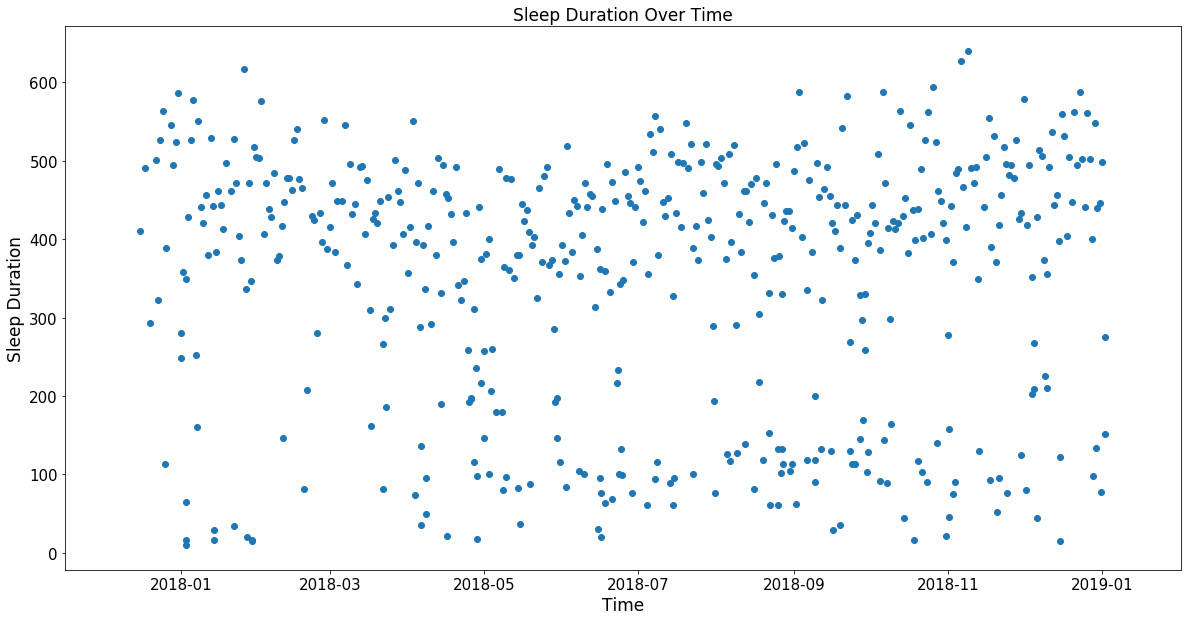

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(list(sleep_starting_time),Goodsleep1)
# sns.regplot(x=sleep_s_f.index.values, y= sleep_s_f.sleep_dur, data=sleep_s_f ,fit_reg=True,scatter=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sleep Duration Over Time',fontsize = 17)
plt.xlabel('Time',fontsize = 17)
plt.ylabel('Sleep Duration',fontsize = 17)
plt.show()

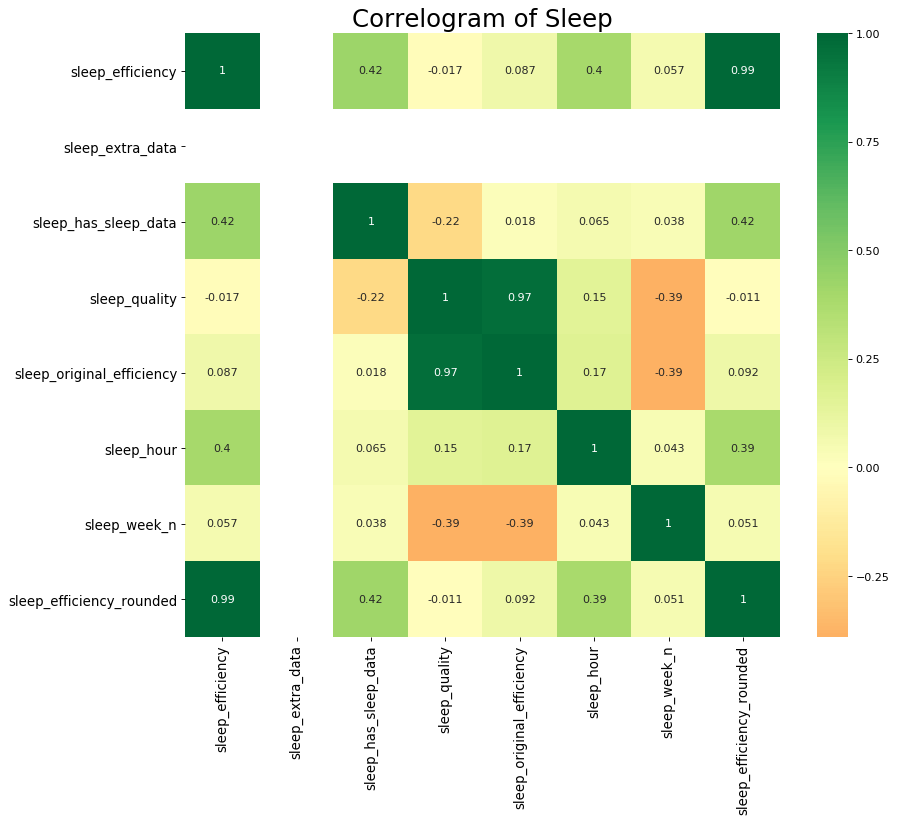

In [17]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
# sns.heatmap(sleep_s_f.corr(), xticklabels=sleep_s_f.corr().columns, yticklabels=sleep_s_f.corr().columns, cmap='RdYlGn', center=0, annot=True)
sns.heatmap(sleep_s_f.corr(), xticklabels=sleep_s_f.corr().columns, yticklabels=sleep_s_f.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Sleep', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# <font color=blue> Exercise </font>

In [18]:
# saving the exer data as pandas dataframe
import pandas as pd
exer = pd.read_csv('./exercise.csv', encoding = 'ascii')
exer.rename(columns = {'end_time':'exer_end_time', 'altitude_loss':'exer_altitude_loss',\
                       'max_altitude':'exer_max_altitude', 'start_time':'exer_start_time',\
                       'count':'exer_count', 'altitude_gain':'exer_altitude_gain', 'duration':'exer_duration',\
                       'deviceuuid':'exer_deviceuuid', 'max_heart_rate':'exer_max_heart_rate',\
                       'mean_heart_rate':'exer_mean_heart_rate', 'pkg_name':'exer_pkg_name',\
                       'max_cadence':'exer_max_cadence', 'time_offset':'exer_time_offset',\
                       'incline_distance':'exer_incline_distance',\
                       'decline_distance':'exer_decline_distance', 'max_speed':'exer_max_speed',\
                       'calorie':'exer_calorie', 'mean_cadence':'exer_mean_cadence', 'mean_speed':'exer_mean_speed',\
                       'update_time':'exer_update_time', 'min_altitude':'exer_min_altitude',\
                       'min_heart_rate':'exer_min_heart_rate', 'count_type':'exer_count_type',\
                       'live_data':'exer_live_data', 'distance':'exer_distance', 'location_data':'exer_location_data',\
                       'datauuid':'exer_datauuid', 'create_time':'exer_create_time'}, inplace=True)



# Defining datetime format in the dataframe
import datetime
exer['exer_end_time'] = pd.to_datetime(exer['exer_end_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
exer['exer_start_time'] = pd.to_datetime(exer['exer_start_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
exer['exer_update_time'] = pd.to_datetime(exer['exer_update_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
exer['exer_create_time'] = pd.to_datetime(exer['exer_create_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

# Taking care of UTC
exerutcH = divmod(pd.to_numeric(exer['exer_time_offset'].apply(lambda x: x[-5:])), 100)[0]
exerutcM = divmod(pd.to_numeric(exer['exer_time_offset'].apply(lambda x: x[-5:])), 100)[1]
exerutc = exerutcH * 3600 + exerutcM * 60
exer['exer_end_time'] = exer['exer_end_time'] + pd.to_timedelta(exerutc, unit='s')
exer['exer_start_time'] = exer['exer_start_time'] + pd.to_timedelta(exerutc, unit='s')
exer['exer_update_time'] = exer['exer_update_time'] + pd.to_timedelta(exerutc, unit='s')
exer['exer_create_time'] = exer['exer_create_time'] + pd.to_timedelta(exerutc, unit='s')

# converting 'com.samsung.health.sleep.end_time' datetimes to normal ones
exer_dur_f = pd.DataFrame(pd.to_datetime(exer['exer_duration'], unit='ms'))
# replacing the converted datetimes with the current one in the table
exer['exer_duration'] = exer_dur_f['exer_duration'].values
# Definig datetime format for duration column
exer['exer_duration'] = pd.to_datetime(exer['exer_duration'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

# removing the unwanted added years by previous command from the column
exer['exer_duration'] = pd.Series([val.time() for val in exer['exer_duration']])

# sorting the exer data and reseting the index
exer_s = exer.sort_values(by = 'exer_start_time')
exer_s.reset_index(drop = True, inplace = True)

# The following is the table of those columns which all of their values are NaN
exer_NaNC = []
for i in range(1,39):
    if exer_s.iloc[:,0].notna().sum() == exer_s.iloc[:,i].isna().sum():
        exer_NaNC.append(exer_s.iloc[:,i].isna().describe())
exer_NaNC = pd.DataFrame(exer_NaNC)
exer_NaNC = exer_NaNC.reset_index()
exer_NaNC.rename(columns = {'index':'exer_NaN_columns'}, inplace=True)
# Now deleting those columns from exer_s table
exer_s_f = exer_s.drop(columns = exer_NaNC.exer_NaN_columns.unique(),index = 1)
exer_s_f = exer_s_f.drop(['Unnamed: 0','comment'], axis = 1)

# showing the filtered data and reseting the index
exer_s_f.reset_index(drop = True, inplace = True)


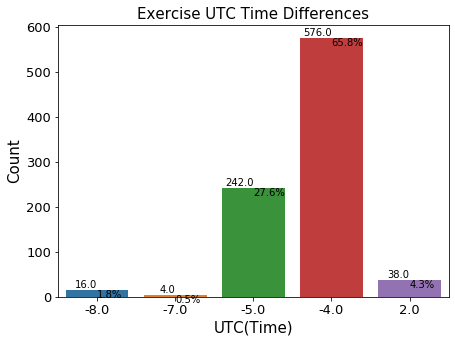

In [19]:
plt.figure(figsize=(7,5))
exer_utc = pd.to_numeric(exer['exer_time_offset'].apply(lambda x: x[-5:]))/100
ax1 = sns.countplot(x=exer_utc.index, data=exer_utc)
ncount = len(exer_utc)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='left', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Exercise UTC Time Differences',fontsize = 15)
plt.xlabel('UTC(Time)',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [20]:
y

38.0

In [21]:
exer_utc.unique()

array([-4., -5., -8.,  2., -7.])

In [22]:
# receiving exer types from samsung developer website

url = 'https://img-developer.samsung.com/onlinedocs/health/android/data/EXERCISE_TYPE.html'
ex_ty = pd.read_html(url, header=0)
ex_ty = pd.DataFrame(ex_ty[0])
ex_ty.drop(columns=['Use only if you cannot match your exercise data with the exercise type here:  Set the value of EXERCISE_TYPE as 0.  Use EXERCISE_CUSTOM_TYPE.  Exercise data that has the 0 or null value for EXERCISE_TYPE  is not shown on Samsung Health but can be saved.'],axis=1,inplace=True)
ex_ty.drop(index=97, inplace=True, axis=0)
ex_ty.iloc[21,0] = 7003

# ex_ty = ex_ty.rename(columns = {'custom type':'exer type', '0':'exer code'})
ex_ty.rename(columns={'Custom type':'exercise_name','0':'exercise_type'},inplace=True)
ex_ty.exercise_type=pd.to_numeric(ex_ty.exercise_type)
exer_s_f.exercise_type=pd.to_numeric(exer_s_f.exercise_type)
ex_full=pd.merge(exer_s_f, ex_ty, on='exercise_type', how='left')

ex_full['exer_day_name']=ex_full['exer_start_time'].dt.weekday_name
ex_full['exer_week_n'] = ex_full['exer_start_time'].dt.week
ex_full.head()


,exer_end_time,exer_altitude_loss,exer_max_altitude,exer_start_time,exer_count,exer_altitude_gain,exer_duration,exer_deviceuuid,exer_max_heart_rate,exer_mean_heart_rate,exer_pkg_name,exer_max_cadence,exer_time_offset,exer_incline_distance,exercise_type,exer_decline_distance,exer_max_speed,exer_calorie,exer_mean_cadence,exer_mean_speed,exer_update_time,exer_min_altitude,exer_min_heart_rate,exer_count_type,exer_live_data,exer_distance,exer_location_data,exer_datauuid,exer_create_time,exercise_name,exer_day_name,exer_week_n
0,2016-06-25 07:34:00.642,21.847322,289.64343,2016-06-25 07:28:30.517,NaN,14.775119,00:05:29.211000,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0700,118.0,1002,261.0,2.492401,66.0,NaN,2.492401,2016-06-25 07:34:09.401,272.650970,NaN,NaN,c63ed4ab-52cc-45f3-8c3f-7e03c99a51ce.live_data...,820.0,c63ed4ab-52cc-45f3-8c3f-7e03c99a51ce.location_...,c63ed4ab-52cc-45f3-8c3f-7e03c99a51ce,2016-06-25 07:28:30.526,Running,Saturday,25
1,2016-09-27 18:04:05.302,58.465260,65.75034,2016-09-27 17:21:42.571,NaN,64.041130,00:40:57.643000,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0700,481.0,1002,554.0,3.024856,408.0,NaN,2.000407,2016-09-27 18:04:25.475,52.467632,NaN,NaN,e4405b87-7b0a-4c7a-af4e-c8796216d8c4.live_data...,4910.0,e4405b87-7b0a-4c7a-af4e-c8796216d8c4.location_...,e4405b87-7b0a-4c7a-af4e-c8796216d8c4,2016-09-27 17:21:42.576,Running,Tuesday,39
2,2016-09-30 20:42:10.952,62.106870,59.14466,2016-09-30 18:29:56.624,NaN,65.792010,00:32:26,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0700,442.0,1002,451.0,4.415482,459.0,NaN,0.000000,2016-09-30 20:42:38.453,44.218452,NaN,NaN,a5659d34-378e-482e-815c-e47a5a6a64fa.live_data...,5510.0,a5659d34-378e-482e-815c-e47a5a6a64fa.location_...,a5659d34-378e-482e-815c-e47a5a6a64fa,2016-09-30 18:29:56.628,Running,Friday,39
3,2017-03-06 10:22:41.693,26.255226,152.85818,2017-03-06 10:05:28.618,2580.0,46.809795,00:16:58.602000,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,170.51129,UTC-0500,379.0,1002,161.0,3.082483,230.0,159.55493,2.899804,2017-03-06 10:28:01.065,128.303540,NaN,30001.0,5f2df103-4494-4c42-be3b-1d612a947145.live_data...,2950.0,5f2df103-4494-4c42-be3b-1d612a947145.location_...,5f2df103-4494-4c42-be3b-1d612a947145,2017-03-06 10:05:28.624,Running,Monday,10
4,2017-03-07 09:48:26.107,0.000000,167.32199,2017-03-07 09:48:16.225,0.0,1.343596,00:00:08.011000,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0500,0.0,11007,0.0,26.228920,1.0,NaN,10.714286,2017-03-07 09:48:29.640,165.604520,NaN,30001.0,764f5cfc-09ef-4aeb-a9c0-7eef20c62409.live_data...,70.0,764f5cfc-09ef-4aeb-a9c0-7eef20c62409.location_...,764f5cfc-09ef-4aeb-a9c0-7eef20c62409,2017-03-07 09:48:16.233,Cycling,Tuesday,10


In [23]:
ex_full['exer_altitude_loss'] = pd.to_numeric(ex_full['exer_altitude_loss'])
ex_full['exer_max_altitude'] = pd.to_numeric(ex_full['exer_max_altitude'])
ex_full['exer_count'] = pd.to_numeric(ex_full['exer_count'])
ex_full['exer_altitude_gain'] = pd.to_numeric(ex_full['exer_altitude_gain'])
ex_full['exer_max_heart_rate'] = pd.to_numeric(ex_full['exer_max_heart_rate'])
ex_full['exer_mean_heart_rate'] = pd.to_numeric(ex_full['exer_mean_heart_rate'])
ex_full['exer_max_cadence'] = pd.to_numeric(ex_full['exer_max_cadence'])
ex_full['exer_incline_distance'] = pd.to_numeric(ex_full['exer_incline_distance'])
ex_full['exer_decline_distance'] = pd.to_numeric(ex_full['exer_decline_distance'])
ex_full['exer_max_speed'] = pd.to_numeric(ex_full['exer_max_speed'])
ex_full['exer_calorie'] = pd.to_numeric(ex_full['exer_calorie'])
ex_full['exer_mean_cadence'] = pd.to_numeric(ex_full['exer_mean_cadence'])
ex_full['exer_mean_speed'] = pd.to_numeric(ex_full['exer_mean_speed'])
ex_full['exer_min_altitude'] = pd.to_numeric(ex_full['exer_min_altitude'])
ex_full['exer_min_heart_rate'] = pd.to_numeric(ex_full['exer_min_heart_rate'])
ex_full['exer_count_type'] = pd.to_numeric(ex_full['exer_count_type'])
ex_full['exer_distance'] = pd.to_numeric(ex_full['exer_distance'])


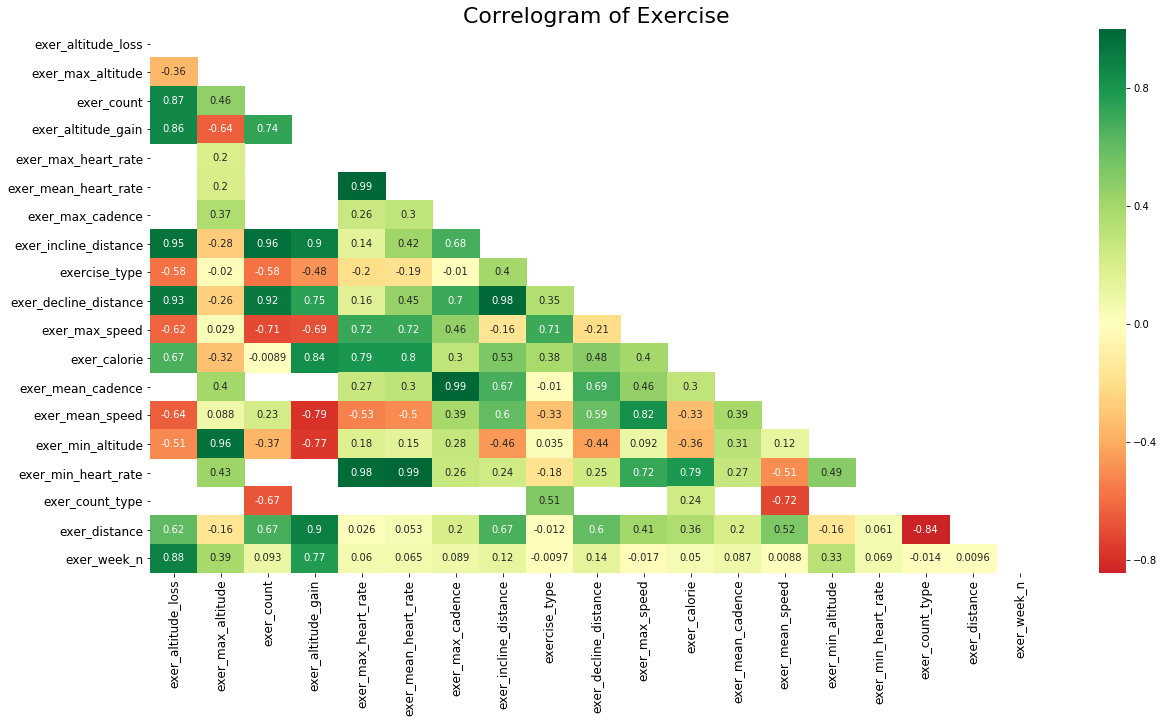

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(ex_full.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))
sns.heatmap(ex_full.corr(), xticklabels=ex_full.corr().columns, yticklabels=ex_full.corr().columns, mask=mask, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of Exercise', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


/Users/eatthis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/eatthis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


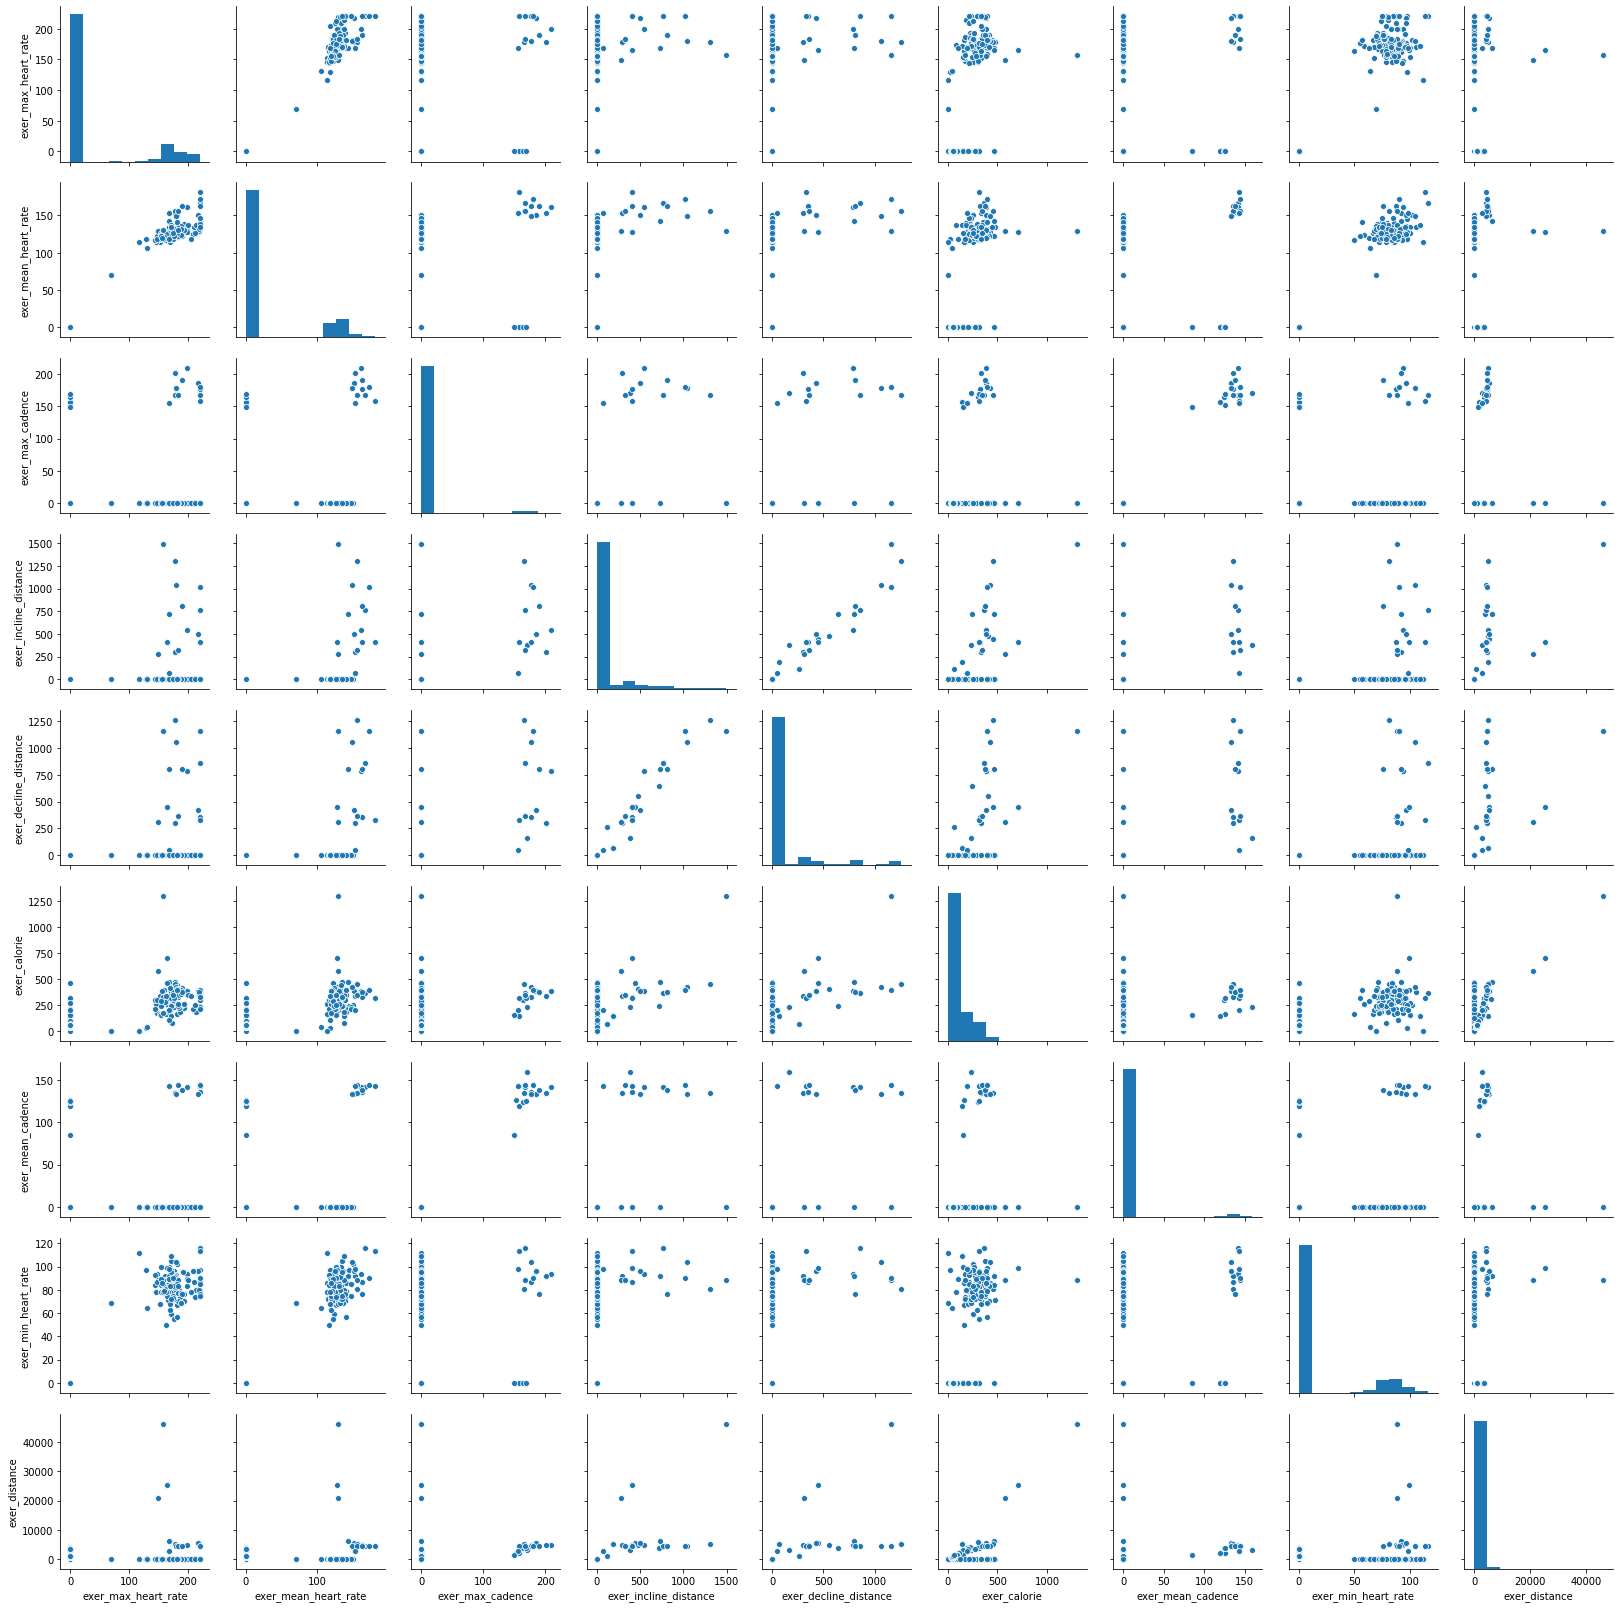

In [25]:
sns.pairplot(dropna=True, data = ex_full[['exer_duration','exer_deviceuuid','exer_max_heart_rate',\
                                          'exer_mean_heart_rate','exer_max_cadence','exer_incline_distance',\
                                          'exer_decline_distance','exer_calorie','exer_mean_cadence',\
                                          'exer_min_heart_rate','exer_distance','exercise_name']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


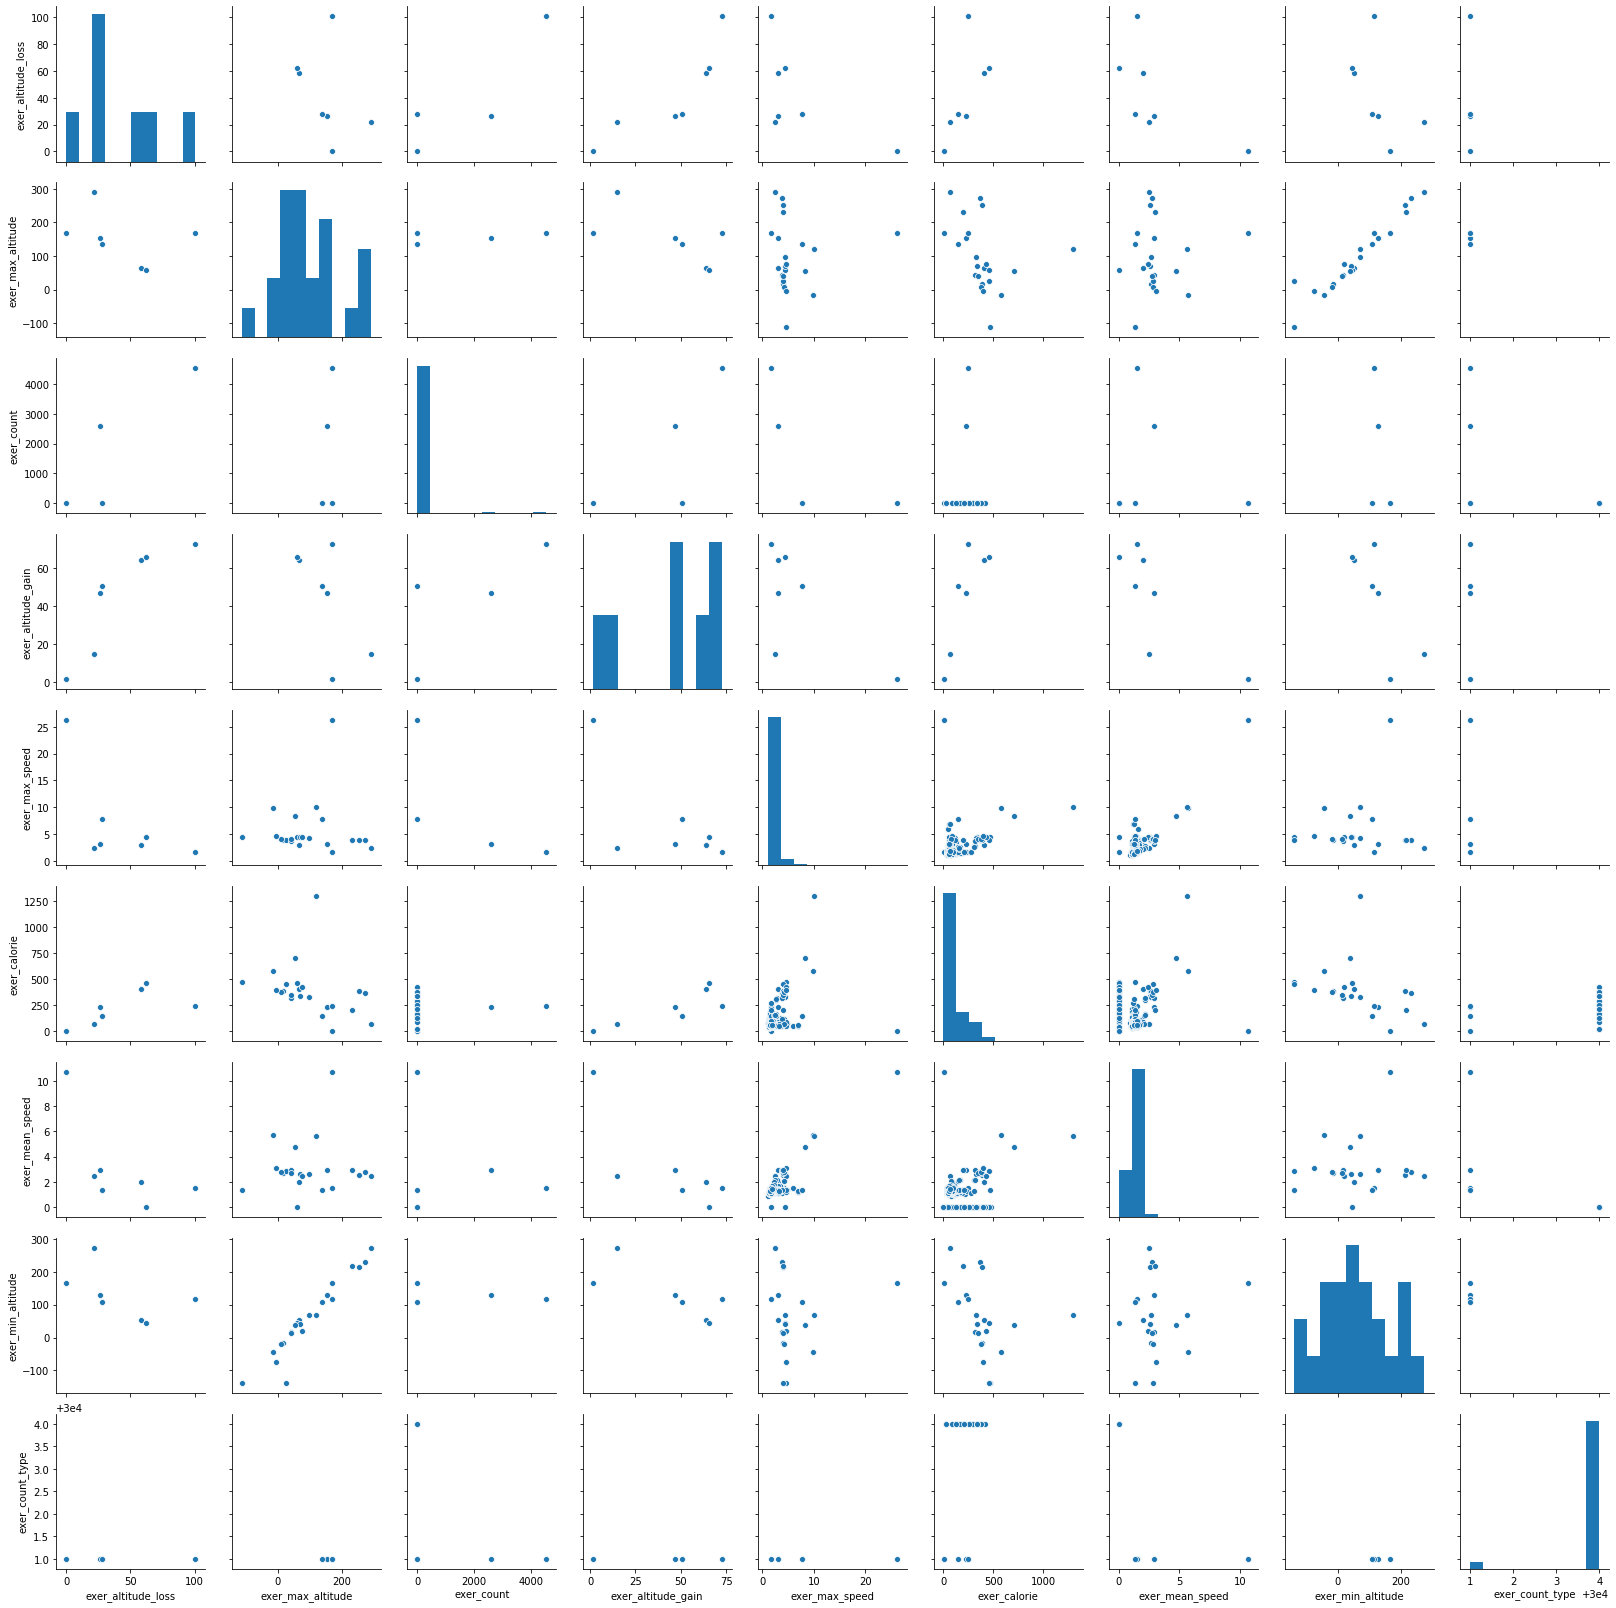

In [26]:
sns.pairplot(dropna=True, data = ex_full[['exer_altitude_loss','exer_max_altitude','exer_count','exer_altitude_gain',\
                                          'exer_max_speed','exer_calorie','exer_mean_speed','exer_min_altitude',\
                                          'exer_count_type']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


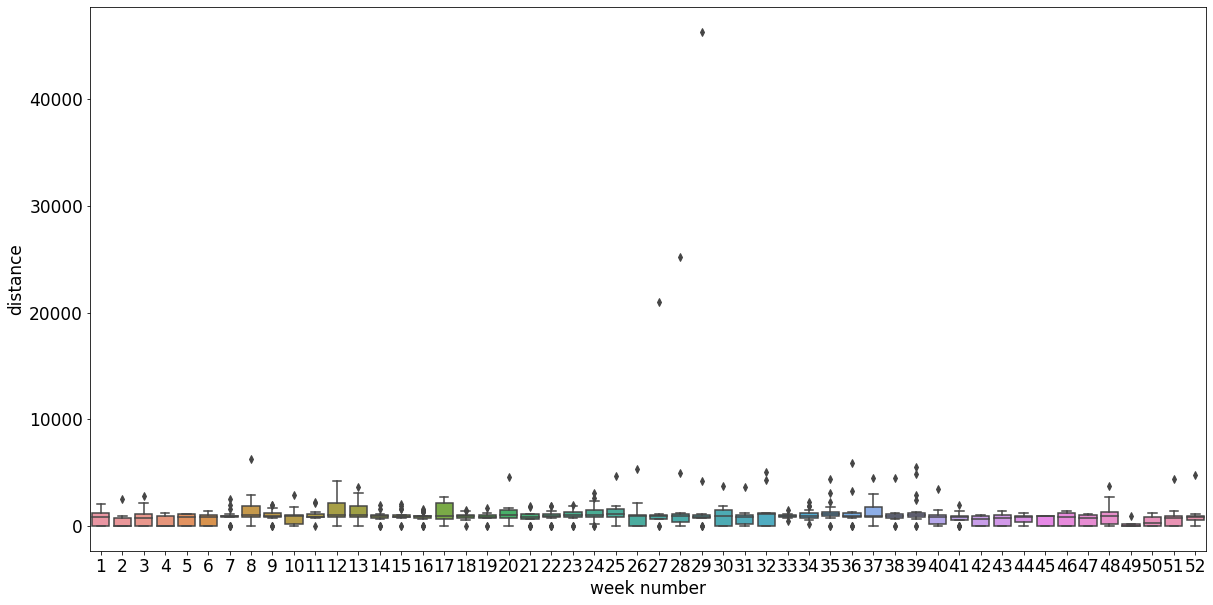

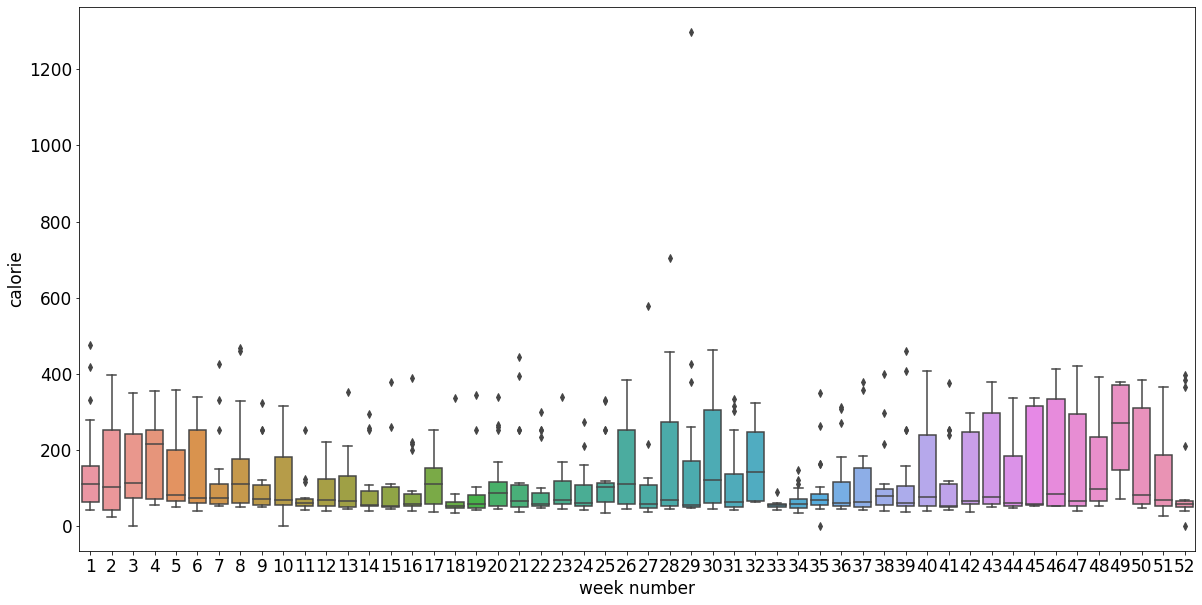

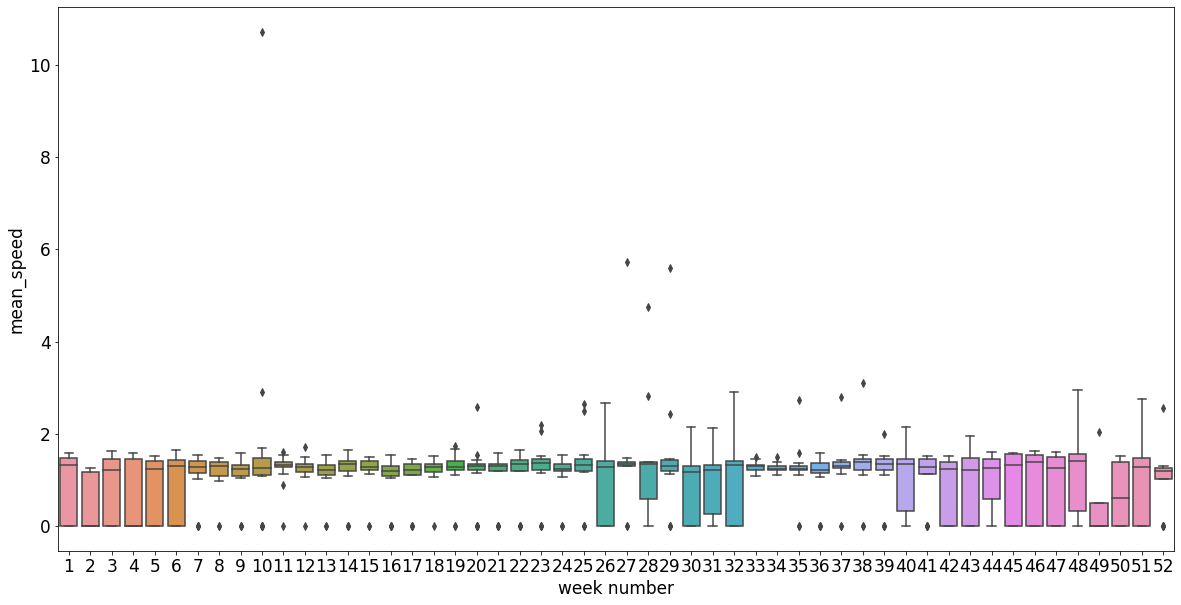

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=ex_full['exer_week_n'], y='exer_distance', data=ex_full)
plt.xlabel('week number',fontsize=17)
plt.ylabel('distance',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

plt.figure(figsize=(20,10))
sns.boxplot(x=ex_full['exer_week_n'], y='exer_calorie', data=ex_full)
plt.xlabel('week number',fontsize=17)
plt.ylabel('calorie',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

plt.figure(figsize=(20,10))
sns.boxplot(x=ex_full['exer_week_n'], y='exer_mean_speed', data=ex_full)
plt.xlabel('week number',fontsize=17)
plt.ylabel('mean_speed',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [28]:
ex_full_table1=ex_full.groupby(['exer_day_name','exercise_name'])['exercise_type'].describe()

ex_full_table1

count     mean  std      min      25%      50%      75%      max
exer_day_name exercise_name                                                                                                   
Friday        Cycling                                           1.0  11007.0  NaN  11007.0  11007.0  11007.0  11007.0  11007.0
              Running                                           3.0   1002.0  0.0   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming    9.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                          96.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0
Monday        Cycling                                           2.0  11007.0  0.0  11007.0  11007.0  11007.0  11007.0  11007.0
              Running                                           4.0   1002.0  0.0   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming    5.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                         104.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0
Saturday      Cycling                                           7.0  11007.0  0.0  11007.0  11007.0  11007.0  11007.0  11007.0
              Running                                           1.0   1002.0  NaN   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming   16.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                          51.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0
Sunday        Cycling                                           2.0  11007.0  0.0  11007.0  11007.0  11007.0  11007.0  11007.0
              Elliptical trainer, moderate effort               1.0  15006.0  NaN  15006.0  15006.0  15006.0  15006.0  15006.0
              Running                                          10.0   1002.0  0.0   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming    6.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                          70.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0
Thursday      Cycling                                           5.0  11007.0  0.0  11007.0  11007.0  11007.0  11007.0  11007.0
              Running                                           2.0   1002.0  0.0   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming   13.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                          84.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0
Tuesday       Cycling                                           4.0  11007.0  0.0  11007.0  11007.0  11007.0  11007.0  11007.0
              Running                                           1.0   1002.0  NaN   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming   20.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                         103.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0
Wednesday     Running                                           1.0   1002.0  NaN   1002.0   1002.0   1002.0   1002.0   1002.0
              Swimming, general, leisurely, not lap swimming    8.0  14001.0  0.0  14001.0  14001.0  14001.0  14001.0  14001.0
              Walking                                         131.0   1001.0  0.0   1001.0   1001.0   1001.0   1001.0   1001.0

The following figure shows number of each exer per day, which represents how likely the person is to do each exer on each day of the week and it matches with the data in the previous table.

I think I need to use short format parameters, sorry if it would become confusing

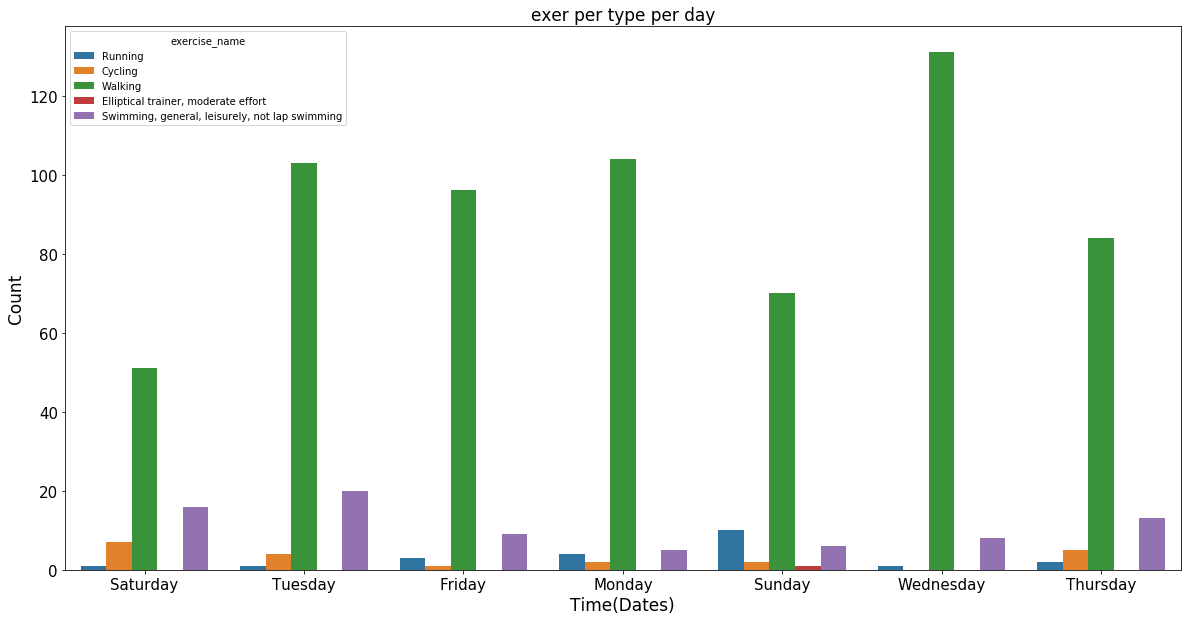

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x ='exer_day_name', hue='exercise_name', data=ex_full)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('exer per type per day',fontsize = 17)
plt.xlabel('Time(Dates)',fontsize = 17)
plt.ylabel('Count',fontsize = 17)
plt.show()


<Figure size 3600x2160 with 0 Axes>

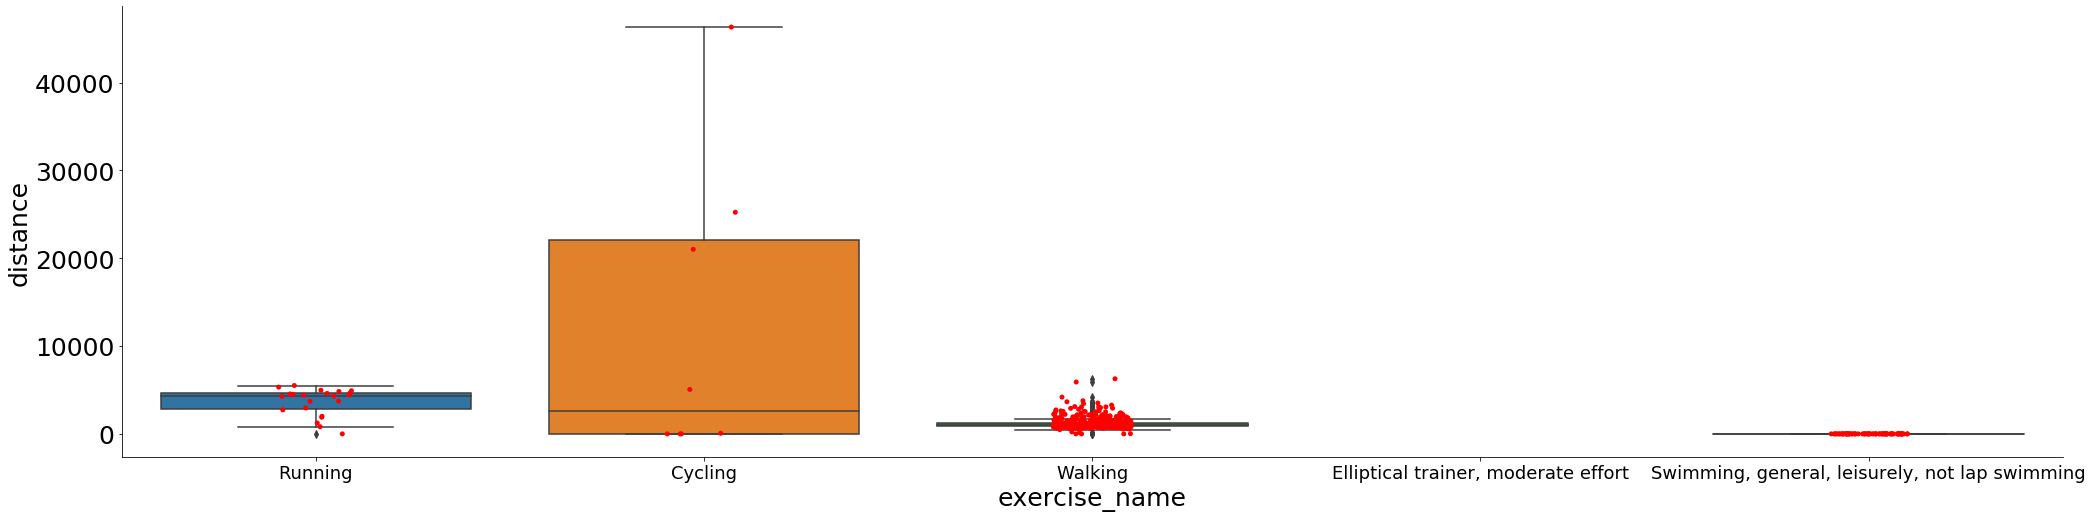

<Figure size 3600x2160 with 0 Axes>

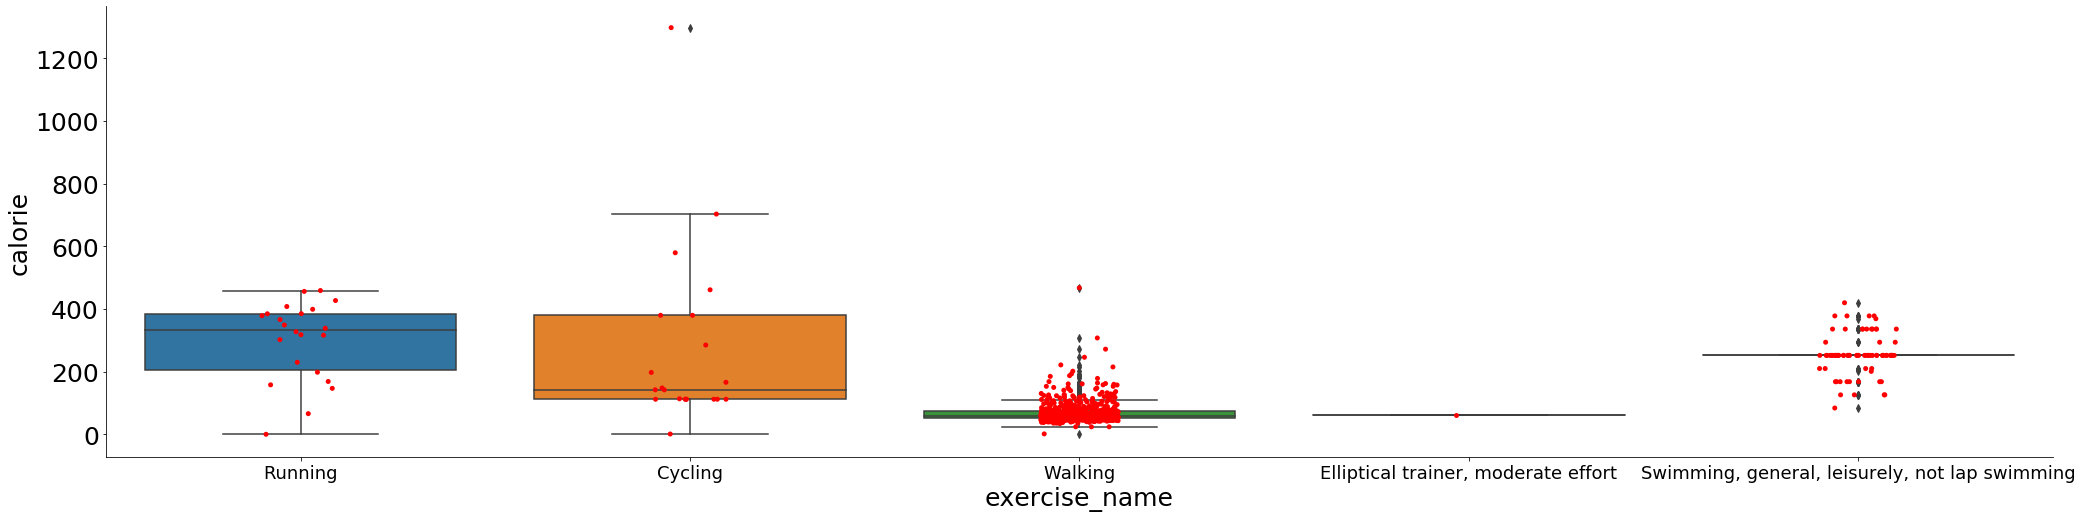

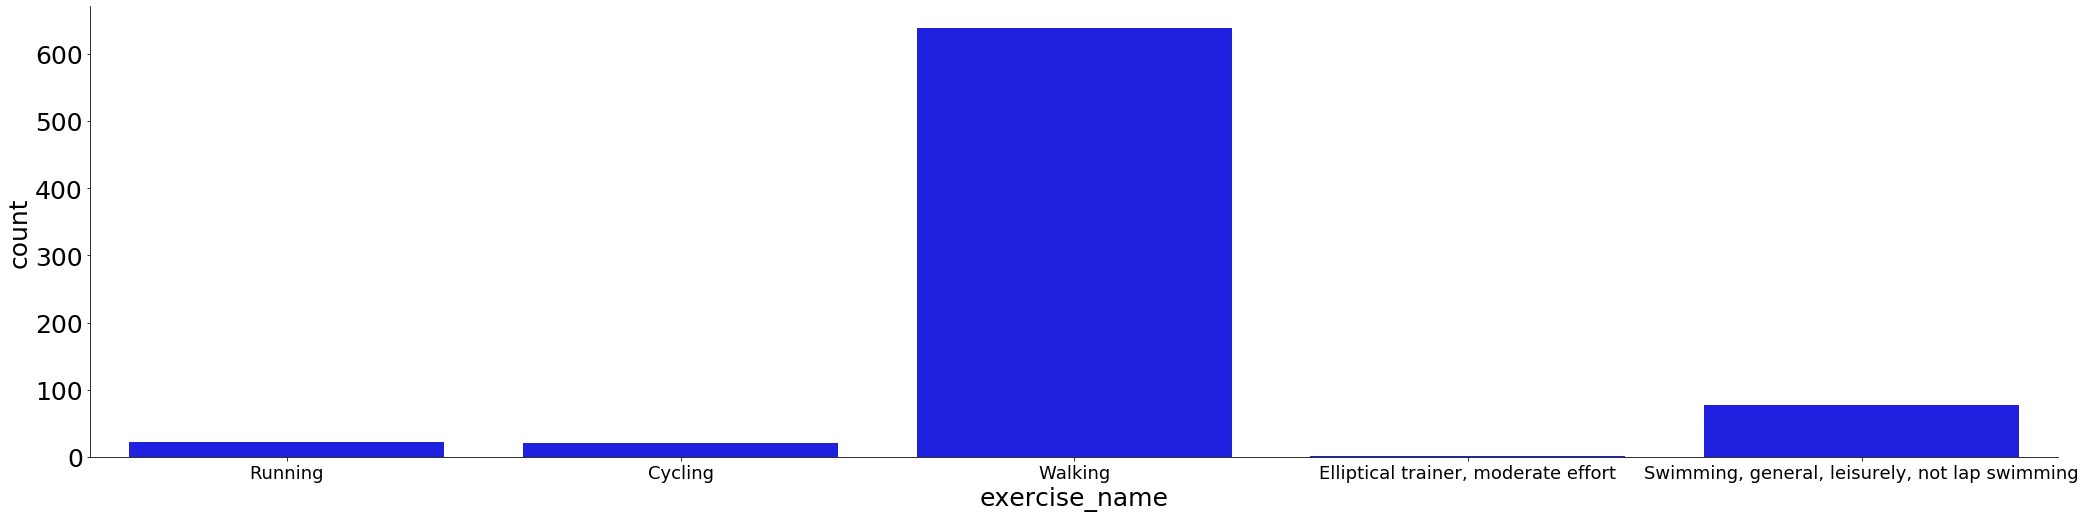

In [30]:
plt.figure(figsize=(50,30))
sns.catplot(data=ex_full, y='exer_distance',
                x='exercise_name',
                kind='strip',
                 color='red', legend=True, n_boot=1000, height =7, 
                     aspect=4)
sns.boxplot(data=ex_full, y='exer_distance',
                x='exercise_name')
plt.xlabel('exercise_name',fontsize=25)
plt.ylabel('distance',fontsize= 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=25)
plt.show()


plt.figure(figsize=(50,30))
sns.catplot(data=ex_full, y='exer_calorie',
                x='exercise_name',
                kind='strip',
                 color='red', legend=True, n_boot=1000, height =7, 
                     aspect=4)
sns.boxplot(data=ex_full, y='exer_calorie',
                x='exercise_name')
plt.xlabel('exercise_name',fontsize=25)
plt.ylabel('calorie',fontsize= 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=25)
plt.show()


sns.catplot(data=ex_full,
                x='exercise_name',
                kind='count',
                 color='blue', legend=True, n_boot=1000, height =7, 
                     aspect=4)
plt.xlabel('exercise_name',fontsize=25)
plt.ylabel('count',fontsize= 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=25)
plt.show()

# <font color=blue> Floors </font>

In [31]:
# saving floors_c data as pandas dataframe
floors_c = pd.read_csv('./floors_climbed.csv', encoding = 'latin_1')
floors_c

floors_c.rename(columns = {'end_time':'floors_end_time', 'pkg_name':'floors_pkg_name',\
                           'time_offset':'floors_time_offset', 'start_time':'floors_start_time',\
                           'datauuid':'floors_datauuid', 'update_time':'floors_update_time', 'deviceuuid':'floors_deviceuuid',\
                           'create_time':'floors_create_time'}, inplace=True)

# defining the floors_c datatime format in the dataframe
import datetime
floors_c['floors_end_time'] = pd.to_datetime(floors_c['floors_end_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
floors_c['floors_start_time'] = pd.to_datetime(floors_c['floors_start_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
floors_c['floors_update_time'] = pd.to_datetime(floors_c['floors_update_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
floors_c['floors_create_time'] = pd.to_datetime(floors_c['floors_create_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

# Taking care of UTC
floors_cutcH = divmod(pd.to_numeric(floors_c['floors_time_offset'].apply(lambda x: x[-5:])), 100)[0]
floors_cutcM = divmod(pd.to_numeric(floors_c['floors_time_offset'].apply(lambda x: x[-5:])), 100)[1]
floors_cutc = floors_cutcH * 3600 + floors_cutcM * 60
floors_c['floors_end_time'] = floors_c['floors_end_time'] + pd.to_timedelta(floors_cutc, unit='s')
floors_c['floors_start_time'] = floors_c['floors_start_time'] + pd.to_timedelta(floors_cutc, unit='s')
floors_c['floors_update_time'] = floors_c['floors_update_time'] + pd.to_timedelta(floors_cutc, unit='s')
floors_c['floors_create_time'] = floors_c['floors_create_time'] + pd.to_timedelta(floors_cutc, unit='s')

floors_c['floors_day_name'] = floors_c['floors_start_time'].dt.day_name()
floors_c['floors_is_weekend'] = floors_c['floors_day_name'].map(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
floors_c['floors_week_n'] = floors_c['floors_start_time'].dt.week

# sorting the floors_c, filtering the data and reseting the index
floors_c_s = floors_c.sort_values(by = 'floors_start_time')
floors_c_s.reset_index(drop = True, inplace = True)
floors_c_s_f = floors_c_s.drop(['Unnamed: 0','custom'], axis = 1)


In [32]:
floors_c_s_f.head()

,floors_end_time,floors_pkg_name,floors_time_offset,floors_start_time,floor,floors_datauuid,floors_update_time,floors_deviceuuid,floors_create_time,floors_day_name,floors_is_weekend,floors_week_n
0,2017-12-16 08:48:18,com.sec.android.app.shealth,UTC-0500,2017-12-16 08:46:12,9.0,a964f836-83e1-5a73-203c-23e66833a6f9,2017-12-16 08:48:49.079,F/D7+hL5E5,2017-12-16 08:48:48.886,Saturday,Weekend,50
1,2017-12-16 11:28:23,com.sec.android.app.shealth,UTC-0500,2017-12-16 11:28:13,1.0,38a818a5-1b9b-e238-585e-a1f73c11a848,2017-12-16 11:32:40.721,F/D7+hL5E5,2017-12-16 11:32:40.719,Saturday,Weekend,50
2,2017-12-17 17:48:36,com.sec.android.app.shealth,UTC-0500,2017-12-17 17:46:26,9.0,7e24a616-4f11-3553-a797-5cb6bb302e0d,2017-12-17 17:50:31.878,F/D7+hL5E5,2017-12-17 17:47:23.443,Sunday,Weekend,50
3,2017-12-18 08:16:28,com.sec.android.app.shealth,UTC-0500,2017-12-18 08:12:32,6.0,5cc29833-0332-15f2-4dc7-7f6b0df38b92,2017-12-18 08:16:30.590,F/D7+hL5E5,2017-12-18 08:15:13.725,Monday,Weekday,51
4,2017-12-18 09:15:38,com.sec.android.app.shealth,UTC-0500,2017-12-18 09:15:09,1.0,31ef213a-bfb8-0963-8383-72f8fd539f75,2017-12-18 09:15:39.715,F/D7+hL5E5,2017-12-18 09:15:36.285,Monday,Weekday,51


According to the next two blocks this time period is about 1 year and 16 days (381 days)

In [33]:
end_date = floors_c_s_f[floors_c_s_f.index.values==floors_c_s_f.index.values[-1]].floors_start_time.dt.date
print(end_date)
start_date = floors_c_s_f[floors_c_s_f.index.values==0].floors_start_time.dt.date
print(start_date)

1179    2019-01-02
Name: floors_start_time, dtype: object
0    2017-12-16
Name: floors_start_time, dtype: object


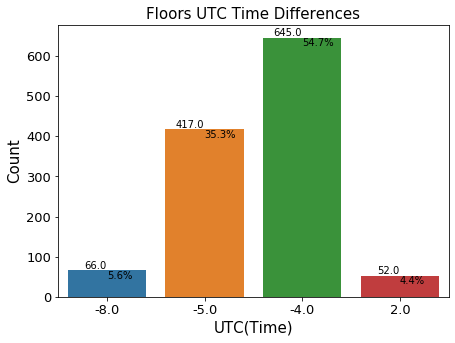

In [34]:
floors_utc = pd.to_numeric(floors_c['floors_time_offset'].apply(lambda x: x[-5:]))/100
plt.figure(figsize=(7,5))
ax1 = sns.countplot(x=floors_utc.index, data=floors_utc)
ncount = len(floors_utc)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='left', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Floors UTC Time Differences',fontsize = 15)
plt.xlabel('UTC(Time)',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [35]:
floors_utc.unique()

array([-4., -5.,  2., -8.])

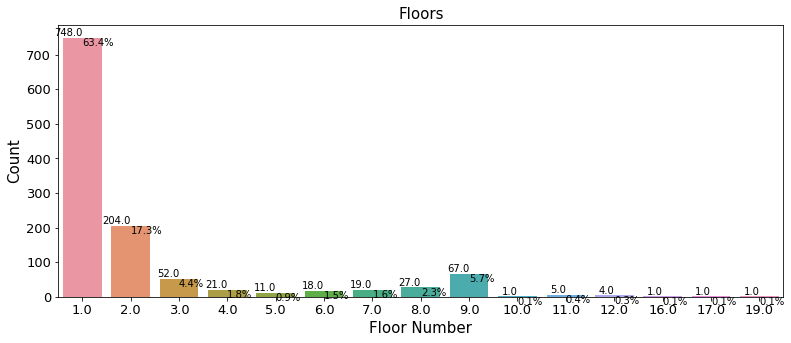

In [36]:
plt.figure(figsize=(13,5))
ax1 = sns.countplot(x=floors_c_s_f.index, data=floors_c_s_f['floor'])
ncount = len(floors_c_s_f['floor'])
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='left', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Floors',fontsize = 15)
plt.xlabel('Floor Number',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

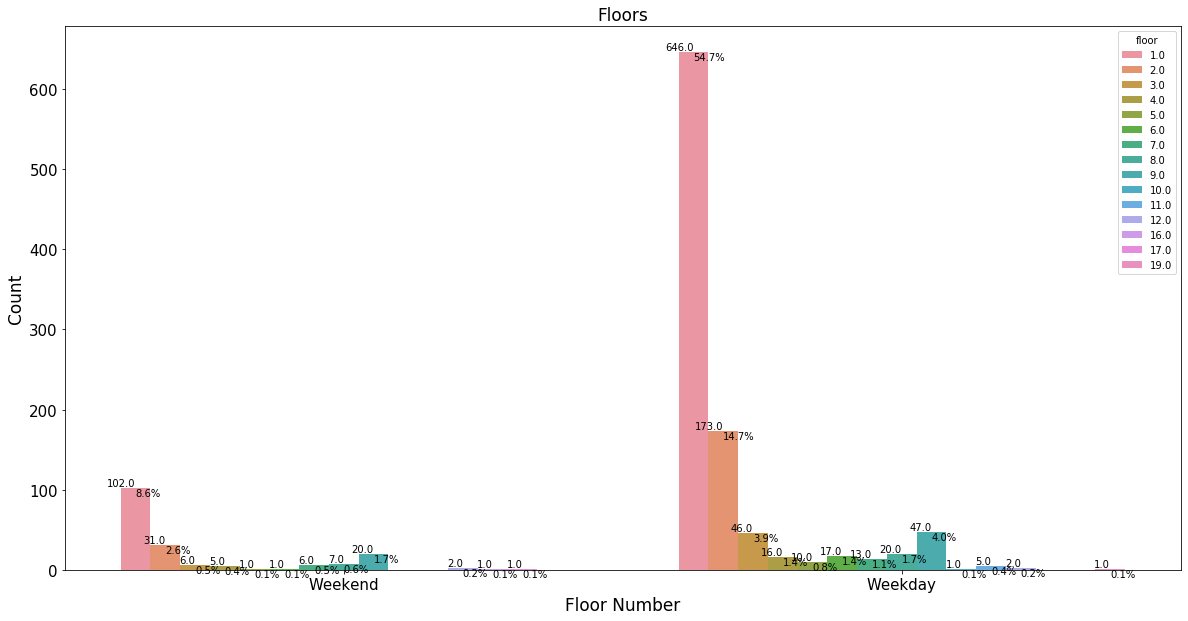

In [37]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(x='floors_is_weekend', hue='floor', data = floors_c_s_f)
ncount = len(floors_c_s_f['floor'])
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='left', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Floors',fontsize = 17)
plt.xlabel('Floor Number',fontsize = 17)
plt.ylabel('Count',fontsize = 17)
plt.show()

number of unique days

In [38]:
floors_c_s_f['floors_start_time'].dt.date.nunique()

290

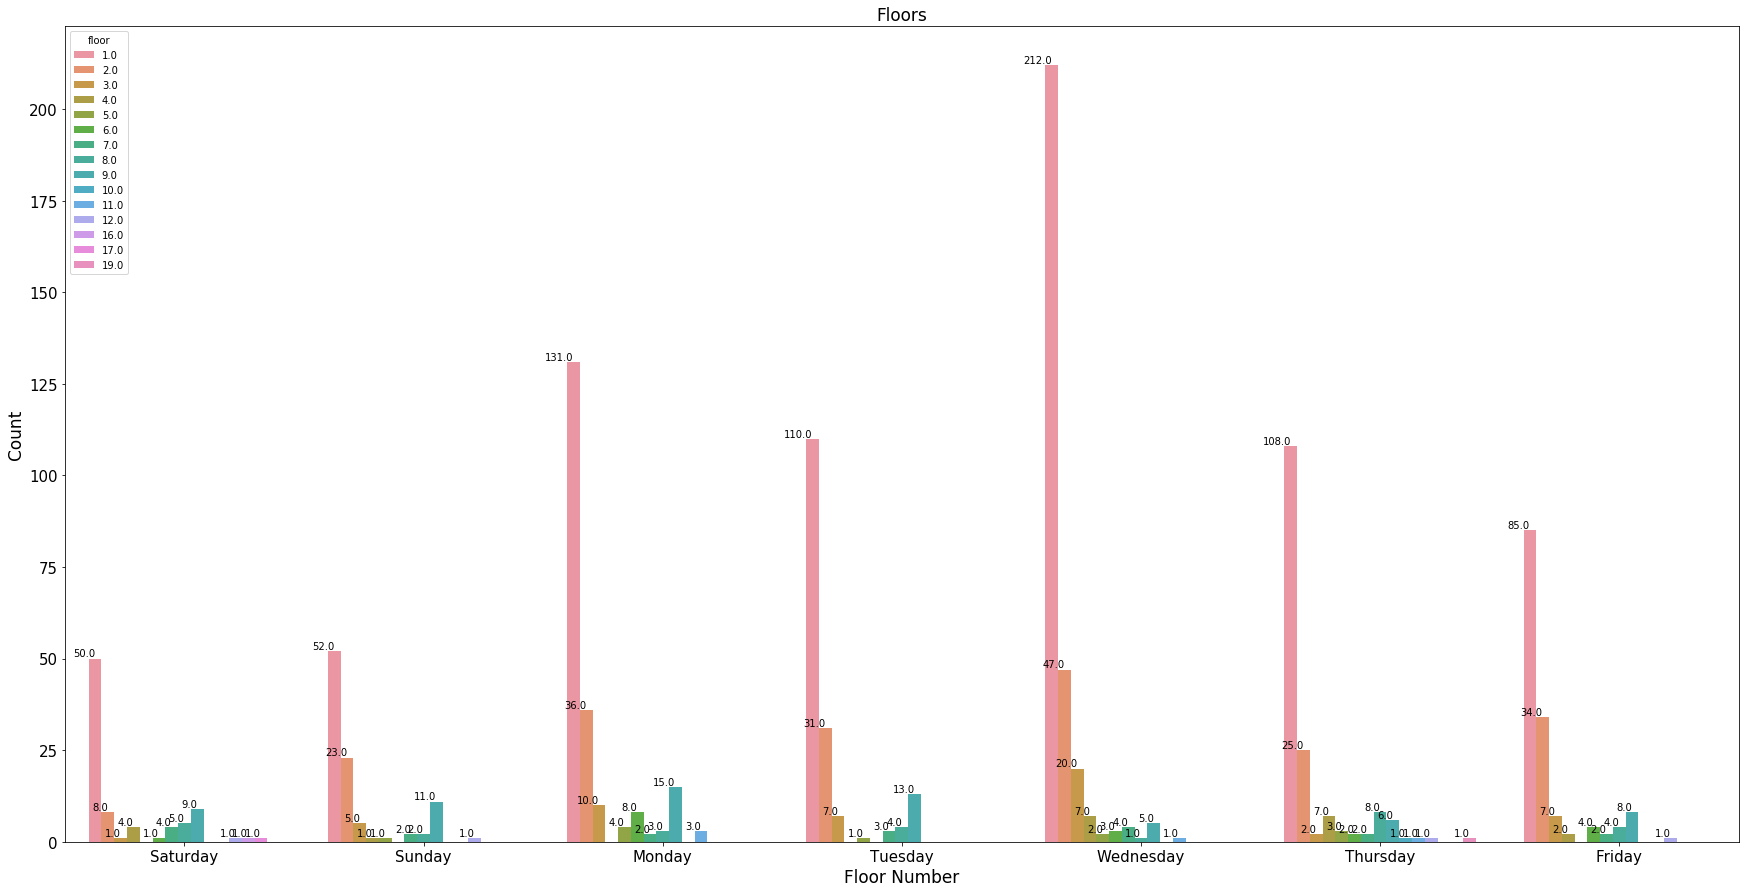

In [39]:
plt.figure(figsize=(30,15))
ax1 = sns.countplot(x='floors_day_name', hue='floor', data = floors_c_s_f)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Floors',fontsize = 17)
plt.xlabel('Floor Number',fontsize = 17)
plt.ylabel('Count',fontsize = 17)
plt.show()

In [40]:
floors_c_s_f.floor.unique()

array([ 9.,  1.,  6.,  2.,  4.,  3., 11.,  5.,  8.,  7., 12., 10., 19.,
       16., 17.])

In [41]:
floors_c_s_f.groupby(['floor']).count()

,floors_end_time,floors_pkg_name,floors_time_offset,floors_start_time,floors_datauuid,floors_update_time,floors_deviceuuid,floors_create_time,floors_day_name,floors_is_weekend,floors_week_n
floor,,,,,,,,,,,
1.0,748,748,748,748,748,748,748,748,748,748,748
2.0,204,204,204,204,204,204,204,204,204,204,204
3.0,52,52,52,52,52,52,52,52,52,52,52
4.0,21,21,21,21,21,21,21,21,21,21,21
5.0,11,11,11,11,11,11,11,11,11,11,11
6.0,18,18,18,18,18,18,18,18,18,18,18
7.0,19,19,19,19,19,19,19,19,19,19,19
8.0,27,27,27,27,27,27,27,27,27,27,27
9.0,67,67,67,67,67,67,67,67,67,67,67


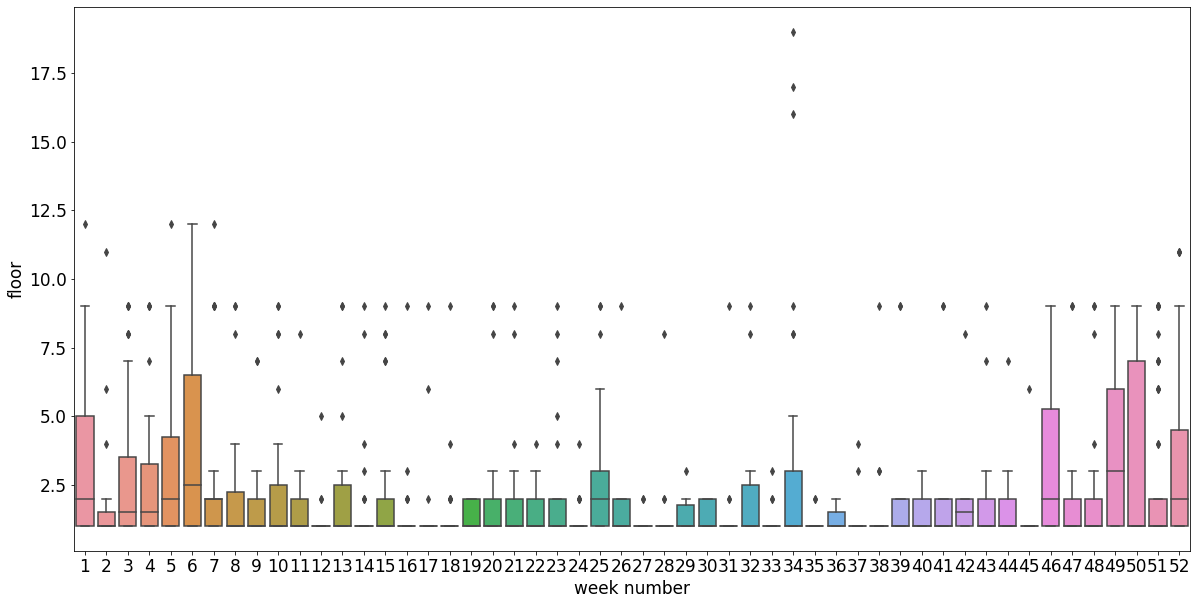

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x=floors_c_s_f['floors_week_n'], y='floor', data=floors_c_s_f)
plt.xlabel('week number',fontsize=17)
plt.ylabel('floor',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# <font color=blue> Heart Rate </font>

In [43]:
# saving the heart_r data as pandas dataframe
heart_r = pd.read_csv('./heart_rate.csv', encoding = 'latin_1')
heart_r

heart_r.rename(columns = {'end_time':'heart_end_time', 'start_time':'heart_start_time',\
                           'update_time':'heart_update_time', 'deviceuuid':'heart_deviceuuid',\
                           'max':'heart_max', 'min':'heart_min', 'pkg_name':'heart_pkg_name',\
                           'time_offset':'heart_time_offset', 'datauuid':'heart_datauuid', 'create_time':'heart_create_time'}, inplace=True)

# defining the datetime format in heart_r dataframe
import datetime
heart_r['heart_end_time'] = pd.to_datetime(heart_r['heart_end_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
heart_r['heart_start_time'] = pd.to_datetime(heart_r['heart_start_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
heart_r['heart_update_time'] = pd.to_datetime(heart_r['heart_update_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
heart_r['heart_create_time'] = pd.to_datetime(heart_r['heart_create_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

# Taking care of UTC
heart_rutcH = divmod(pd.to_numeric(heart_r['heart_time_offset'].apply(lambda x: x[-5:])), 100)[0]
heart_rutcM = divmod(pd.to_numeric(heart_r['heart_time_offset'].apply(lambda x: x[-5:])), 100)[1]
heart_rutc = heart_rutcH * 3600 + heart_rutcM * 60
heart_r['heart_end_time'] = heart_r['heart_end_time'] + pd.to_timedelta(heart_rutc, unit='s')
heart_r['heart_start_time'] = heart_r['heart_start_time'] + pd.to_timedelta(heart_rutc, unit='s')
heart_r['heart_update_time'] = heart_r['heart_update_time'] + pd.to_timedelta(heart_rutc, unit='s')
heart_r['heart_create_time'] = heart_r['heart_create_time'] + pd.to_timedelta(heart_rutc, unit='s')
heart_r['heart_week_n'] = heart_r['heart_start_time'].dt.week

# sorting the heart_r data and reseting the index
heart_r_s = heart_r.sort_values(by = 'heart_start_time')
heart_r_s.drop(heart_r_s.index[[0,1]], inplace = True)
heart_r_s.reset_index(drop = True, inplace = True)
# now dropping the 'binning_data' column
heart_r_s_f = heart_r_s.drop(['Unnamed: 0','binning_data','custom','comment'], axis = 1)
heart_r_s_f.head()

,heart_end_time,heart_rate,heart_start_time,heart_beat_count,heart_update_time,heart_deviceuuid,heart_max,heart_min,heart_pkg_name,heart_time_offset,heart_datauuid,heart_create_time,heart_week_n
0,2016-06-09 23:11:09.456,52.0,2016-06-09 23:11:04.783,0,2016-06-09 23:11:38.226,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,UTC+0430,24e78fa7-6904-4c9f-9c66-5ae7ab35edb0,2016-06-09 23:11:38.226,23
1,2016-06-10 12:35:36.753,76.0,2016-06-10 12:35:33.590,0,2016-06-10 12:35:45.925,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,UTC+0430,492ed1f5-c75d-427e-a671-1309d2b7b4c0,2016-06-10 12:35:45.925,23
2,2016-06-11 09:59:38.666,61.0,2016-06-11 09:59:15.020,0,2016-06-11 09:59:51.197,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,UTC+0430,4c93417f-7846-4192-8d92-dc81270fa9b1,2016-06-11 09:59:51.197,23
3,2016-06-11 16:08:31.311,66.0,2016-06-11 16:08:27.445,0,2016-06-11 16:08:39.844,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,UTC+0430,897bd867-18b4-4b4a-ba37-04de4acd7c96,2016-06-11 16:08:39.844,23
4,2016-06-13 14:34:58.623,61.0,2016-06-13 14:34:18.535,0,2016-06-13 14:35:03.612,jQfnryI8/B,NaN,NaN,com.sec.android.app.shealth,UTC+0430,9deabae9-da44-422f-b679-4956bc1bfe1d,2016-06-13 14:35:03.612,24


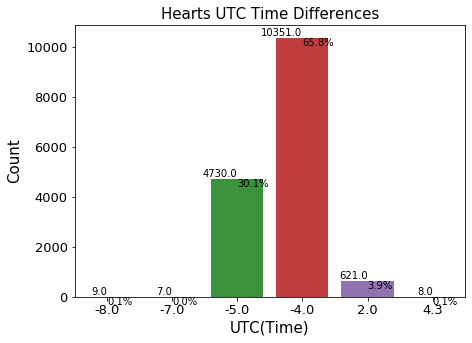

In [44]:
heart_utc = pd.to_numeric(heart_r['heart_time_offset'].apply(lambda x: x[-5:]))/100
plt.figure(figsize=(7,5))
ax1 = sns.countplot(x=heart_utc.index, data=heart_utc)
ncount = len(heart_utc)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='left', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Hearts UTC Time Differences',fontsize = 15)
plt.xlabel('UTC(Time)',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [45]:
heart_utc.unique()

array([-5. , -4. ,  2. , -8. , -7. ,  4.3])

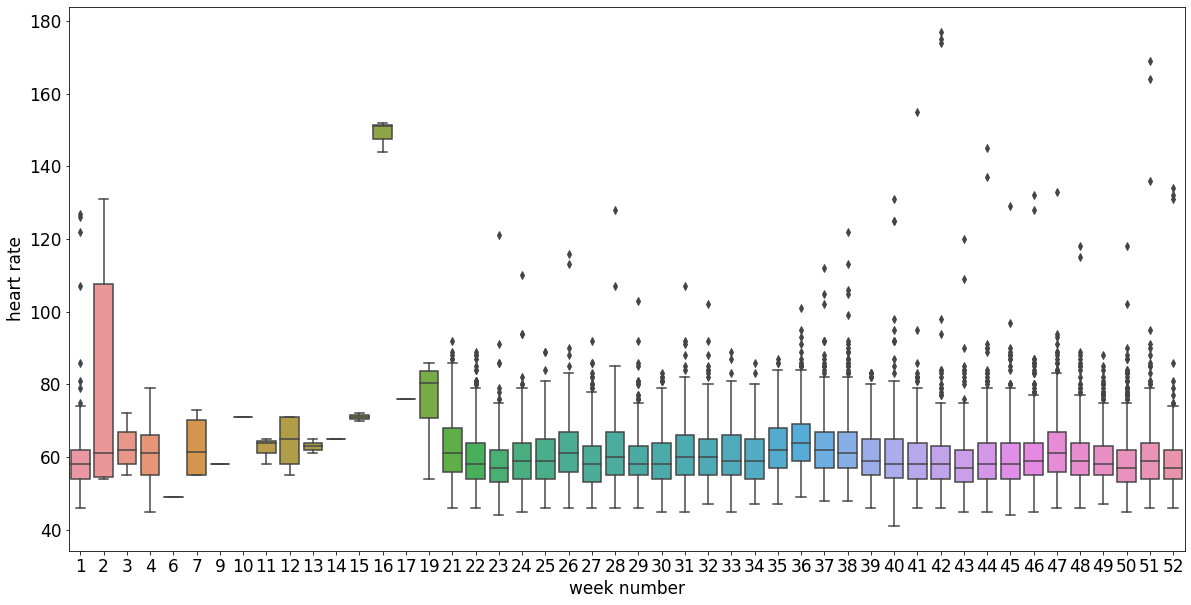

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(x=heart_r_s_f['heart_week_n'], y='heart_rate', data=heart_r_s_f)
plt.xlabel('week number',fontsize=17)
plt.ylabel('heart rate',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# <font color=blue> Step </font>

In [47]:
# saving the data as pandas dataframe
step_c = pd.read_csv('./step_count.csv', encoding = 'latin_1')

step_c.rename(columns = {'end_time':'step_end_time', 'start_time':'step_start_time', 'count':'step_count',\
                         'calorie':'step_calorie', 'sample_position_type':'step_sample_position_type',\
                         'deviceuuid':'step_deviceuuid', 'update_time':'step_update_time', 'speed':'step_speed',\
                         'pkg_name':'step_pkg_name', 'time_offset':'step_time_offset', 'custom':'step_custom',\
                         'distance':'step_distance', 'datauuid':'step_datauuid', 'create_time':'step_create_time'}, inplace=True)

# Defining the datetime in the dataframe
import datetime
step_c['step_end_time'] = pd.to_datetime(step_c['step_end_time'], format = '%Y-%m-%d %H:%M:%S.%f', utc = False)
step_c['step_start_time'] = pd.to_datetime(step_c['step_start_time'], format = '%Y-%m-%d %H:%M:%S.%f', utc = False)
step_c['step_update_time'] = pd.to_datetime(step_c['step_update_time'], format = '%Y-%m-%d %H:%M:%S.%f', utc = False)
step_c['step_create_time'] = pd.to_datetime(step_c['step_create_time'], format = '%Y-%m-%d %H:%M:%S.%f', utc = False)

# Taking care of UTC
step_cutcH = divmod(pd.to_numeric(step_c['step_time_offset'].apply(lambda x: x[-5:])), 100)[0]
step_cutcM = divmod(pd.to_numeric(step_c['step_time_offset'].apply(lambda x: x[-5:])), 100)[1]
step_cutc = step_cutcH * 3600 + step_cutcM * 60
step_c['step_end_time'] = step_c['step_end_time'] + pd.to_timedelta(step_cutc, unit='s')
step_c['step_start_time'] = step_c['step_start_time'] + pd.to_timedelta(step_cutc, unit='s')
step_c['step_update_time'] = step_c['step_update_time'] + pd.to_timedelta(step_cutc, unit='s')
step_c['step_create_time'] = step_c['step_create_time'] + pd.to_timedelta(step_cutc, unit='s')

# step_c = step_c['sample_position_type'].replace({'wrist':230002.0})
# step_c.sample_position_type.rename_categories({230002.0: 'wrist'})
# mapping = {'sample_position_type': 230002.0}
# step_c['sample_position_type'] = step_c['sample_position_type'].astype('float64') 

step_c['step_sample_position_type'].replace({230002.0:'wrist'},inplace=True)

# for i in step_c.sample_position_type.index.values:
#     if step_c.sample_position_type.values[i]==230002.0:
#         step_c.sample_position_type.values[i]='wrist'
        
#     j=step_c.index.values+1
# sorting the step_c data and reseting the index
step_c_s = step_c.sort_values('step_start_time')
step_c_s.reset_index(drop = True, inplace = True)
step_c_s_f = step_c_s.drop(['Unnamed: 0'], axis = 1)

step_c_s_f['step_day_name'] = step_c_s_f['step_create_time'].dt.day_name()
step_c_s_f['step_is_weekend'] = step_c_s_f['step_day_name'].map(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
step_c_s_f['step_week_n'] = step_c_s_f['step_start_time'].dt.week

step_c_s_f.head()

,step_end_time,step_start_time,step_count,step_calorie,step_sample_position_type,step_deviceuuid,step_update_time,step_speed,step_pkg_name,step_time_offset,step_custom,step_distance,step_datauuid,step_create_time,step_day_name,step_is_weekend,step_week_n
0,2018-11-29 05:56:59.999,2018-11-29 05:56:00,54,2.41,wrist,F/D7+hL5E5,2018-11-29 06:15:00.221,1.611111,com.sec.android.app.shealth,UTC-0500,NaN,42.42,961b109a-21c6-758d-9e73-e601d9524ee4,2018-11-29 06:15:00.221,Thursday,Weekday,48
1,2018-11-29 05:57:59.999,2018-11-29 05:57:00,78,3.38,wrist,F/D7+hL5E5,2018-11-29 06:15:00.227,1.805556,com.sec.android.app.shealth,UTC-0500,NaN,58.63,4c23e976-0474-f885-8378-6a18449e0863,2018-11-29 06:15:00.226,Thursday,Weekday,48
2,2018-11-29 06:03:59.999,2018-11-29 06:03:00,24,0.96,wrist,F/D7+hL5E5,2018-11-29 06:15:00.229,0.972222,com.sec.android.app.shealth,UTC-0500,NaN,15.16,9a171018-f498-44e8-7f40-697a85a1e6b7,2018-11-29 06:15:00.229,Thursday,Weekday,48
3,2018-11-29 06:25:59.999,2018-11-29 06:25:00,17,0.72,wrist,F/D7+hL5E5,2018-11-29 06:35:00.240,1.305556,com.sec.android.app.shealth,UTC-0500,NaN,12.61,c7a019d9-efd4-c0a1-61fc-0eb84774c69e,2018-11-29 06:35:00.237,Thursday,Weekday,48
4,2018-11-29 09:20:59.999,2018-11-29 09:20:00,19,0.87,wrist,F/D7+hL5E5,2018-11-29 09:35:00.242,1.777778,com.sec.android.app.shealth,UTC-0500,NaN,15.58,a5fee3ae-827d-3d89-b002-ff42c604dd76,2018-11-29 09:35:00.241,Thursday,Weekday,48


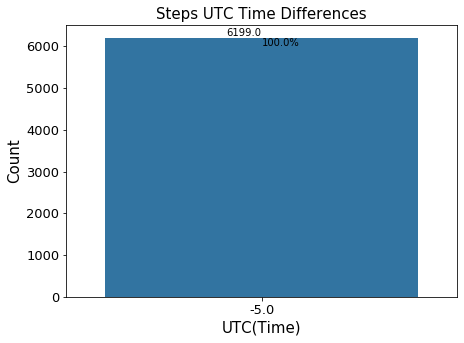

In [48]:
step_utc = pd.to_numeric(step_c['step_time_offset'].apply(lambda x: x[-5:]))/100
plt.figure(figsize=(7,5))
ax1 = sns.countplot(x=step_utc.index, data=step_utc)
ncount = len(step_utc)
for i in ax1.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='left', va='top')
    ax1.annotate('{:.1f}'.format(y), (x.mean(), y), 
            ha='right', va='bottom')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Steps UTC Time Differences',fontsize = 15)
plt.xlabel('UTC(Time)',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [49]:
step_utc.unique()

array([-5.])

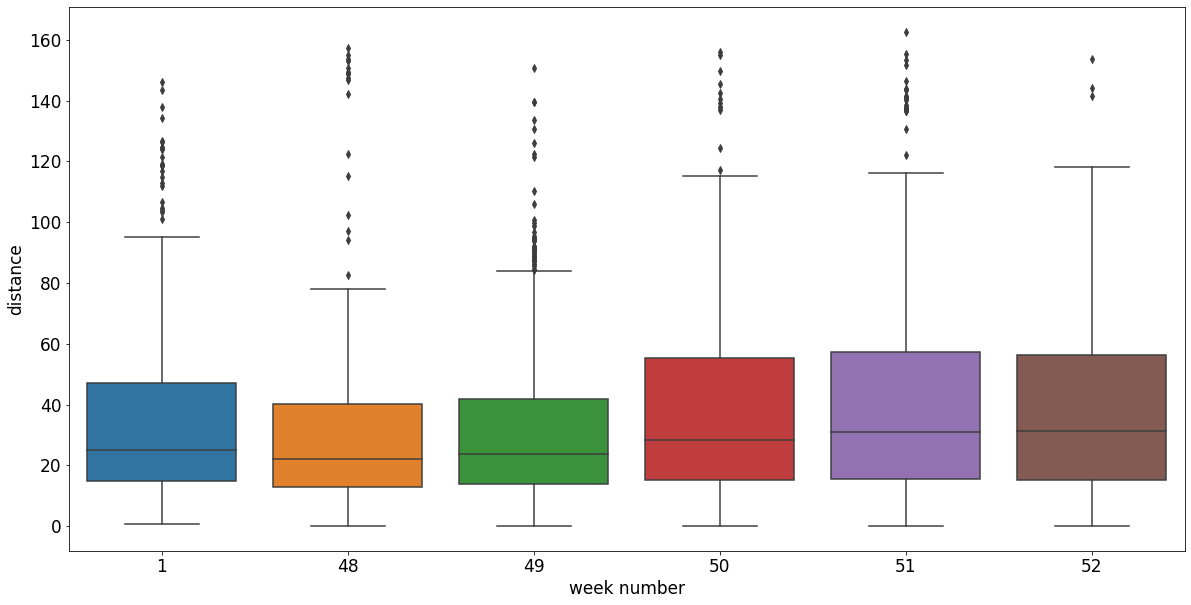

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(x=step_c_s_f['step_week_n'], y='step_distance', data=step_c_s_f)
plt.xlabel('week number',fontsize=17)
plt.ylabel('distance',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

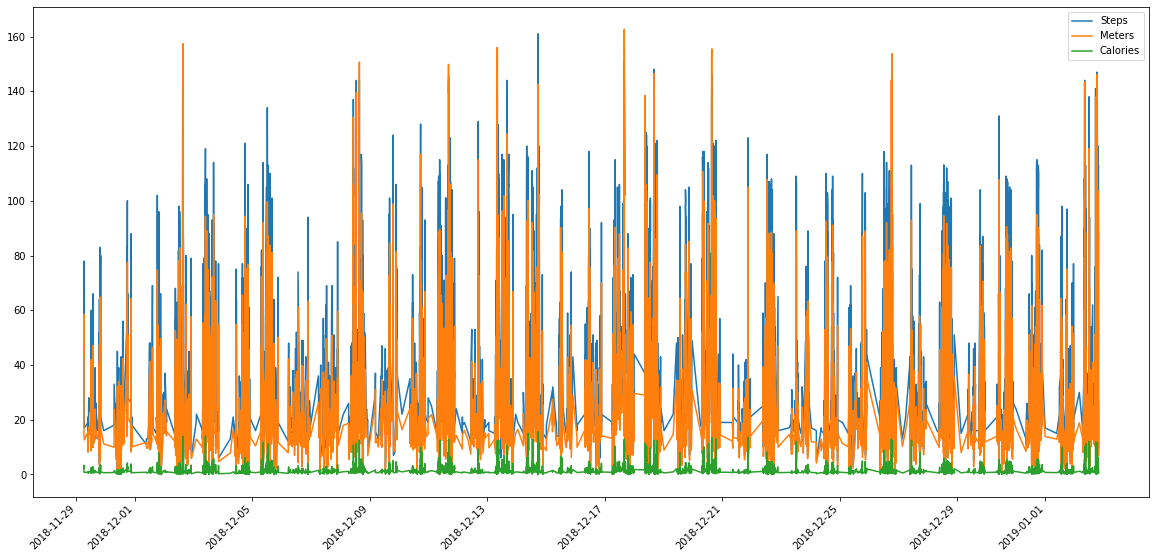

In [51]:
fig, plt1 = plt.subplots(1, 1, figsize = (20, 10))
plt1.plot(step_c_s_f['step_create_time'], step_c_s_f['step_count'], '-', label = 'Steps')
plt1.plot(step_c_s_f['step_create_time'], step_c_s_f['step_distance'], '-', label = 'Meters')
plt1.plot(step_c_s_f['step_create_time'], step_c_s_f['step_calorie'], '-', label = 'Calories')
plt1.legend()
fig.autofmt_xdate(rotation = 45)

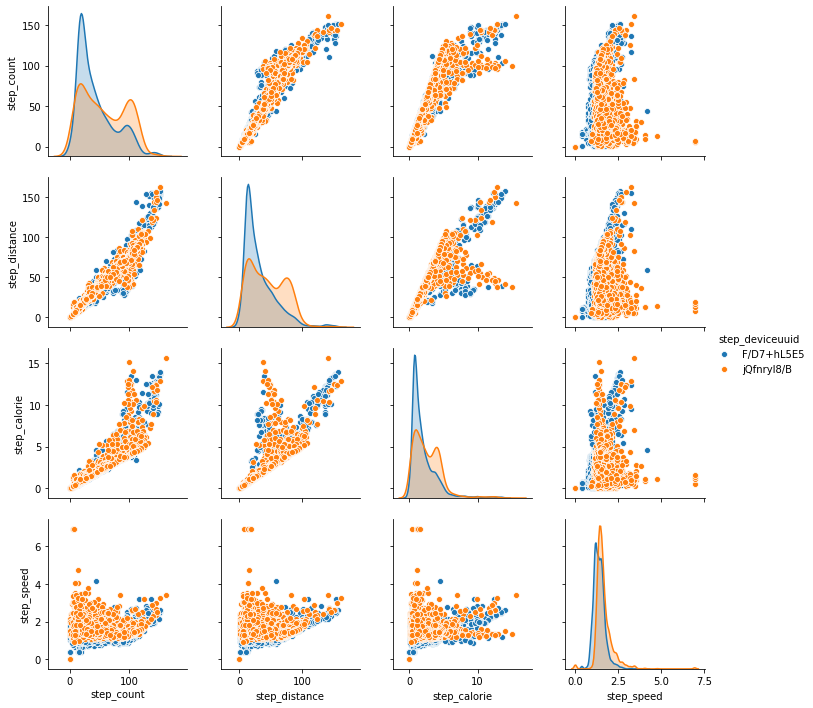

In [52]:
sns.pairplot(hue = 'step_deviceuuid', data = step_c_s_f[['step_count', 'step_distance', 'step_calorie', 'step_speed', 'step_deviceuuid']])


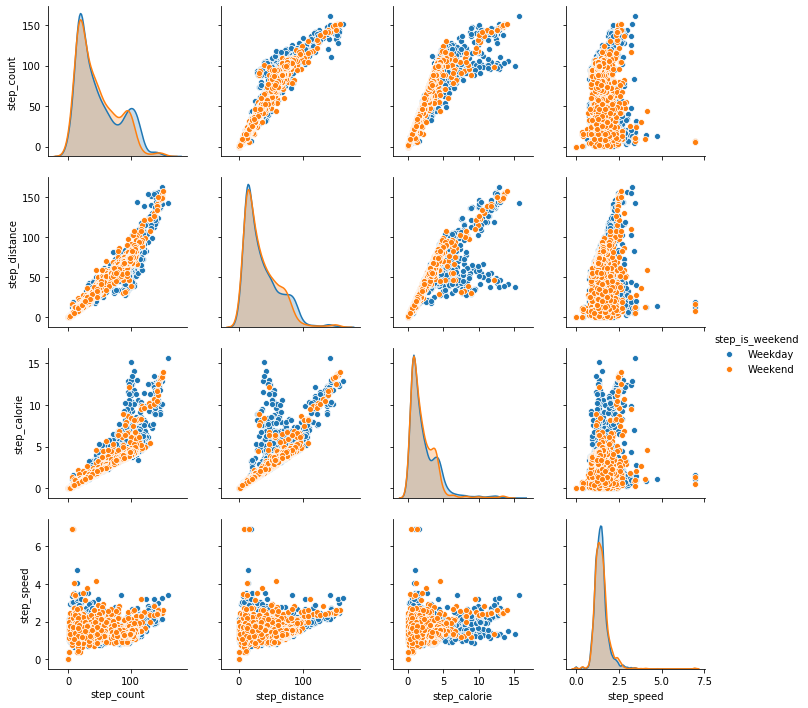

In [53]:
sns.pairplot(hue = 'step_is_weekend', data = step_c_s_f[['step_count', 'step_distance', 'step_calorie', 'step_speed', 'step_day_name', 'step_is_weekend']])


# <font color=blue> Combining datasets </font>

In [54]:
# exer_and_floors = pd.merge(left=ex_full, right=floors_c_s_f, how='left', left_on=ex_full.exer_start_time.dt.date, right_on=floors_c_s_f.floors_start_time.dt.date)
# exer_and_floors = exer_and_floors.drop(['key_0'], axis=1)
# exer_and_floors['exer_distance'] = exer_and_floors['exer_distance'] - exer_and_floors ==1.0

In [55]:
# exer_and_floors

In [56]:
# exer_and_floors.drop_duplicates('exer_start_time')


In [57]:
# exer_and_floors

In [58]:
# exer_and_floors.groupby('floor').count()

In [59]:
# exer_and_floors

In [60]:
# import dask.dataframe as dd

# alldata = pd.merge(left=sleep_s_f,right=ex_full, how='outer', left_on=sleep_s_f.sleep_start_time.dt.day, right_on=ex_full.exer_start_time.dt.day)
# alldata = alldata.drop(['key_0'], axis=1)
# alldata = pd.merge(left=alldata,right=floors_c_s_f, how='outer', left_on=alldata.sleep_start_time.dt.day, right_on=floors_c_s_f.floors_start_time.dt.day)
# alldata = alldata.drop(['key_0'], axis=1)

# alldata = pd.merge(left=alldata,right=step_c_s_f, how='outer', left_on=alldata.sleep_start_time.dt.day, right_on=step_c_s_f.step_start_time.dt.day)
# alldata = alldata.drop(['key_0'], axis=1)
# alldata = pd.merge(left=alldata,right=heart_r_s_f, how='outer', left_on=alldata.sleep_start_time.dt.day, right_on=heart_r_s_f.heart_start_time.dt.day)
# alldata = alldata.drop(['key_0'], axis=1)
# ## alldata = dd.concat([sleep_s_f, ex_full], join='outer').drop_duplicates()


In [61]:
# alldata

In [62]:
# from sqlalchemy import create_engine
# engine = create_engine('sqlite:////Users/eatthis/Documents/Google_Drive_P_on_MAC/Courses/Lantern_Institute/Fundamentals_of_Data_Science/Project/Health_Data/sleep_s_f.sql', echo=False, encoding='UTF-8')
# sleep_s_f.to_sql('sleep_s_f.sql', engine)

In [63]:
# import pandas as pd
# from sqlalchemy import create_engine
# engine = create_engine('postgresql://newuser:@localhost:5432/sleep_s_f.sql')


In [64]:
# sleep_s_f.to_sql('sleep_s_f', con=engine, index=False)


In [65]:
# import sqlite3
# con = sqlite3.connect('ex_full.db')
# ex_full.to_sql(name='ex_full.db', con=con)

In [66]:
# con = sqlite3.connect('sleep_s_f.db')
# sleep_s_f.to_sql(name='sleep_s_f.db', con=con)


In [67]:
# p2 = pd.read_sql('select * from sleep_s_f', con)
# p2

In [68]:
# p2.sleep_start_time.dt.date

# <font color=blue> Summary </font>

In [69]:
summary = pd.read_csv('./summary.csv', encoding='latin-1')
# converting 'longest_idle_time' datetimes to normal ones
summary_lit = pd.DataFrame(pd.to_datetime(summary['longest_idle_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['longest_idle_time'] = summary_lit['longest_idle_time'].values

# converting 'run_time' datetimes to normal ones
summary_rt = pd.DataFrame(pd.to_datetime(summary['run_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['run_time'] = summary_rt['run_time'].values

# converting 'longest_active_time' datetimes to normal ones
summary_lat = pd.DataFrame(pd.to_datetime(summary['longest_active_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['longest_active_time'] = summary_lat['longest_active_time'].values

# converting 'day_time' datetimes to normal ones
summary_dt = pd.DataFrame(pd.to_datetime(summary['day_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['day_time'] = summary_dt['day_time'].values

# converting 'walk_time' datetimes to normal ones
summary_wt = pd.DataFrame(pd.to_datetime(summary['walk_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['walk_time'] = summary_wt['walk_time'].values

# converting 'walk_time' datetimes to normal ones
summary_at = pd.DataFrame(pd.to_datetime(summary['active_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['active_time'] = summary_at['active_time'].values

# converting 'walk_time' datetimes to normal ones
summary_ot = pd.DataFrame(pd.to_datetime(summary['others_time'], unit ='ms'))
# replacing the converted datetimes with the current one in the table
summary['others_time'] = summary_ot['others_time'].values

# define the times then sort it here
import datetime
summary['longest_idle_time'] = pd.to_datetime(summary['longest_idle_time'], format='%H:%M:%S.%f', utc=False)
summary['run_time'] = pd.to_datetime(summary['run_time'], format='%H:%M:%S.%f', utc=False)
summary['update_time'] = pd.to_datetime(summary['update_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
summary['longest_active_time'] = pd.to_datetime(summary['longest_active_time'], format='%H:%M:%S.%f', utc=False)
summary['day_time'] = pd.to_datetime(summary['day_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
summary['walk_time'] = pd.to_datetime(summary['walk_time'], format='%H:%M:%S.%f', utc=False)
summary['active_time'] = pd.to_datetime(summary['active_time'], format='%H:%M:%S.%f', utc=False)
summary['others_time'] = pd.to_datetime(summary['others_time'], format='%H:%M:%S.%f', utc=False)
summary['create_time'] = pd.to_datetime(summary['create_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

# summary['longest_idle_time'] = summary['longest_idle_time'].dt.time
# summary['run_time'] = summary['run_time'].dt.time

# sorting sleep according to 'com.samsung.health.sleep.start_time'
summary = summary.sort_values(by = 'day_time')
summary.reset_index(drop = True, inplace = True)
summary = summary.drop(['Unnamed: 0'], axis = 1)

summary['day_name'] = summary['create_time'].dt.day_name()
# summary['distance in km'] = summary.distance/1000
summary['is_weekend'] = summary['day_name'].map(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# sleep_s_f_sleep_dur = (sleep_s_f['com.samsung.health.sleep.end_time'] - sleep_s_f['com.samsung.health.sleep.start_time']).astype('timedelta64')
# sleep_s_f = sleep_s_f.assign(sleep_dur = sleep_s_f_sleep_dur)
# sleep_s_f['sleep_dur'] = pd.to_datetime(sleep_s_f['sleep_dur'], format='%Y-%m-%d %H:%M:%S', utc=False)
# summary['longest_idle_time'] = pd.Series([val.time() for val in summary['longest_idle_time']])

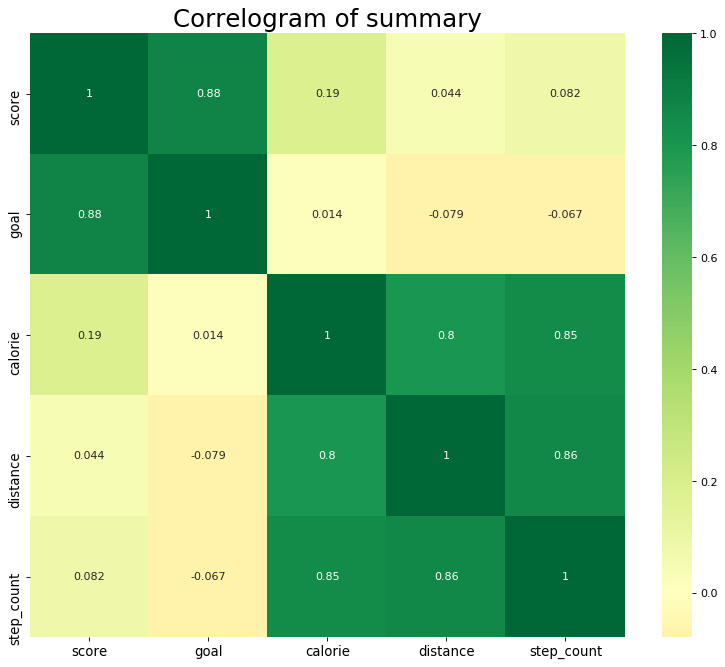

In [70]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
# sns.heatmap(sleep_s_f.corr(), xticklabels=sleep_s_f.corr().columns, yticklabels=sleep_s_f.corr().columns, cmap='RdYlGn', center=0, annot=True)
sns.heatmap(summary.corr(), xticklabels=summary.corr().columns, yticklabels=summary.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of summary', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 3600x2160 with 0 Axes>

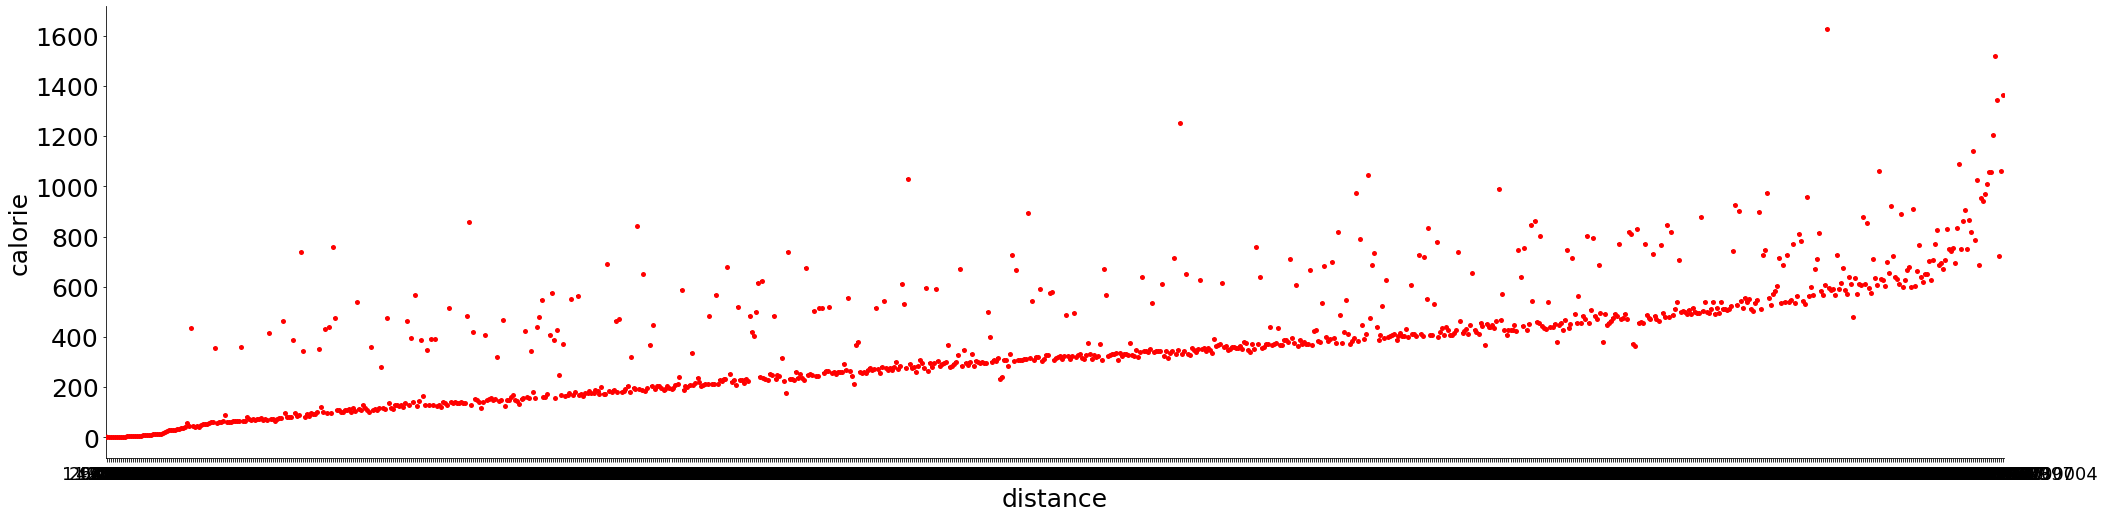

In [71]:
plt.figure(figsize=(50,30))
sns.catplot(data=summary, y='calorie',
                x='distance',
                kind='strip',
                 color='red', legend=True, n_boot=1000, height =7, 
                     aspect=4)
sns.boxplot(data=summary, y='calorie',
                x='distance')
plt.xlabel('distance',fontsize=25)
plt.ylabel('calorie',fontsize= 25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=25)
plt.show()

<Figure size 1440x720 with 0 Axes>

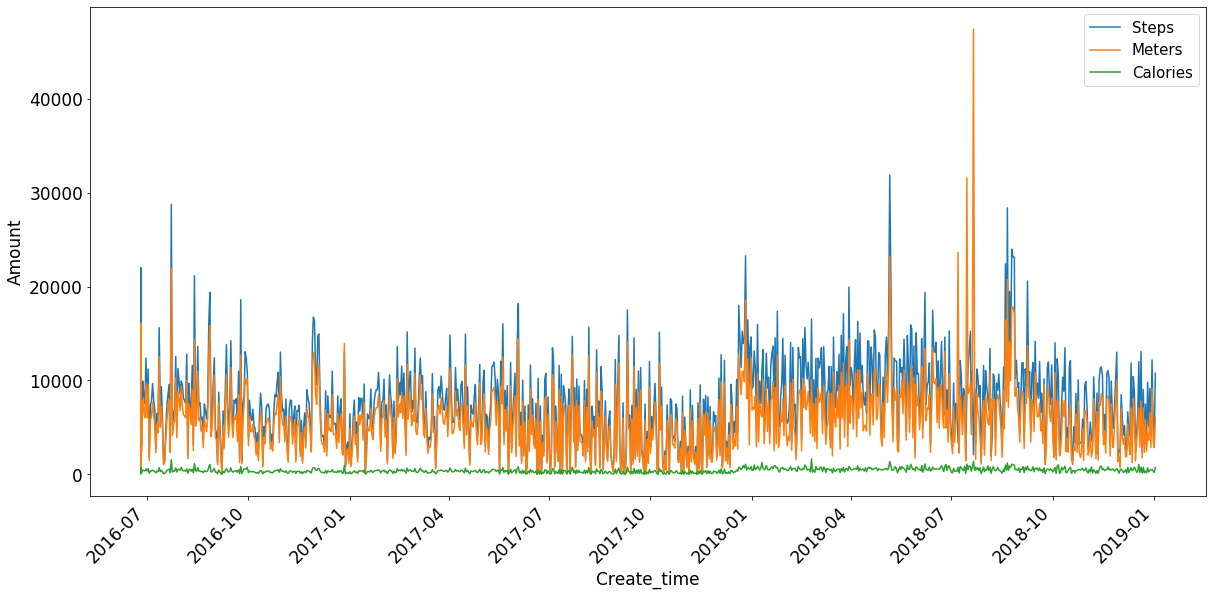

In [72]:
plt.figure(figsize=(20,10))
fig, plt1 = plt.subplots(1, 1, figsize = (20, 10))
plt1.plot(summary['create_time'], summary['step_count'], '-', label = 'Steps')
plt1.plot(summary['create_time'], summary['distance'], '-', label = 'Meters')
plt1.plot(summary['create_time'], summary['calorie'], '-', label = 'Calories')
plt1.legend(fontsize=15)
fig.autofmt_xdate(rotation = 45)
plt.xlabel('Create_time',fontsize=17)
plt.ylabel('Amount',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()


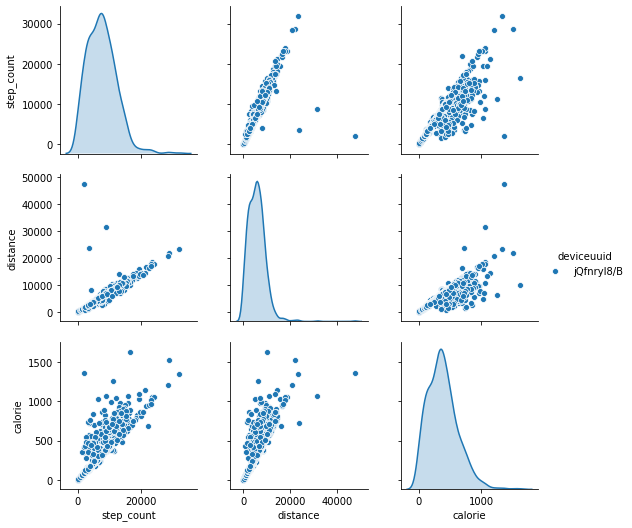

In [73]:
# plt.figure(figsize=(20,10))
sns.pairplot(hue = 'deviceuuid', data = summary[['longest_idle_time','step_count', 'distance', 'calorie', 'run_time', 'longest_active_time', 'walk_time', 'active_time', 'others_time','deviceuuid']])
# sns.pairplot(x_vars= 'day_time', y_vars='distance', data = summary, kind='scatter', size=20)
plt.xlabel('Create_time',fontsize=17)
plt.ylabel('Amount',fontsize= 17)
# plt.xticks('day_time',fontsize=17)
# plt.yticks('distance',fontsize=17)
plt.show()

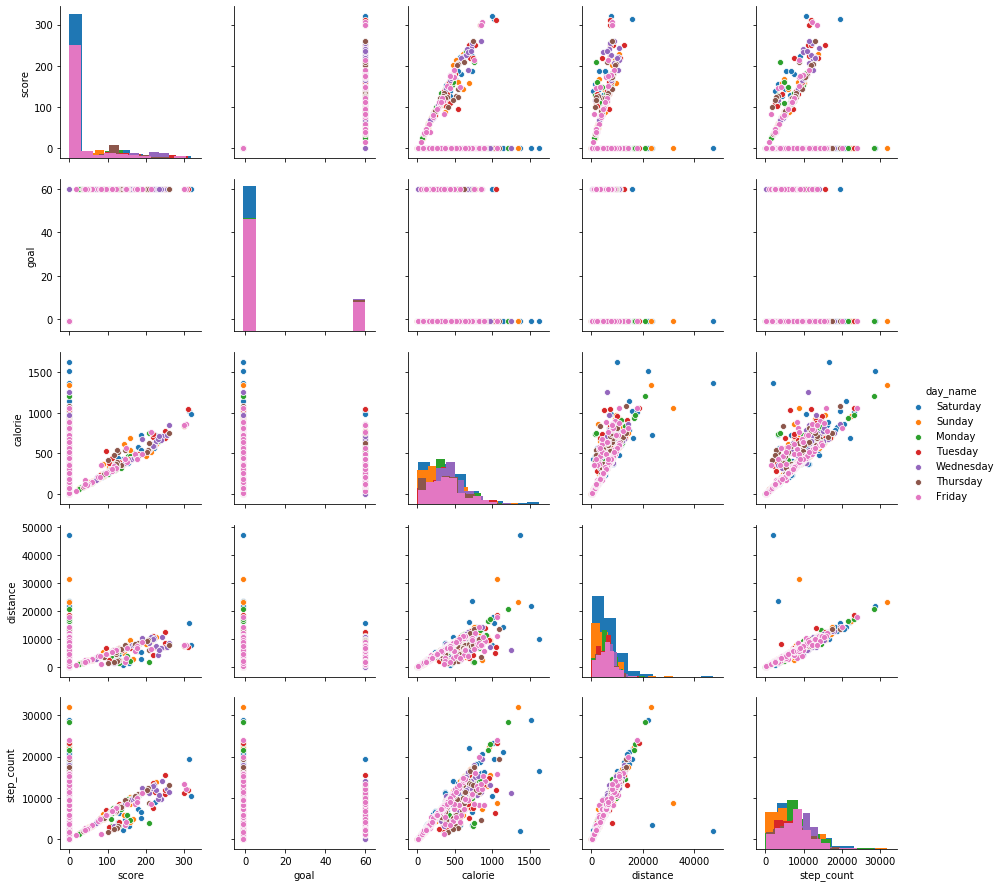

In [74]:
# sns.pairplot(hue = 'deviceuuid', data = summary[['longest_idle_time','step_count', 'distance', 'calorie', 'run_time', 'longest_active_time', 'walk_time', 'active_time', 'others_time','deviceuuid']])
# plt.figure(figsize=(20,10))
sns.pairplot(summary, hue='day_name', diag_kind='hist')
# sns.factorplot(summary, kind='count')
# sns.lmplot(x='longest_idle_time',y='longest_active_time',data=summary, hue=['is_weekend'])

# plt.xlabel('Create_time',fontsize=17)
# plt.ylabel('Amount',fontsize= 17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()


In [75]:
summary['longest_idle_time_inmin'] = summary.longest_idle_time.dt.hour * 60 + summary.longest_idle_time.dt.minute
summary['longest_active_time_inmin'] = summary.longest_active_time.dt.hour * 60 + summary.longest_active_time.dt.minute
summary['run_time_inmin'] = summary.run_time.dt.hour * 60 + summary.run_time.dt.minute
summary['walk_time_inmin'] = summary.walk_time.dt.hour *60 + summary.walk_time.dt.minute
summary['active_time_inmin'] = summary.active_time.dt.hour * 60 + summary.active_time.dt.minute
summary['others_time_inmin'] = summary.others_time.dt.hour * 60 + summary.others_time.dt.minute
# summary_stats = summary.drop(columns=['longest_idle_time_inmin', 'longest_active_time_inmin', 'run_time_inmin', 'walk_time_inmin','active_time_inmin', 'others_time_inmin'])
# summary_times = summary.drop(columns=['score','extra_data','goal','deviceuuid','datauuid'])

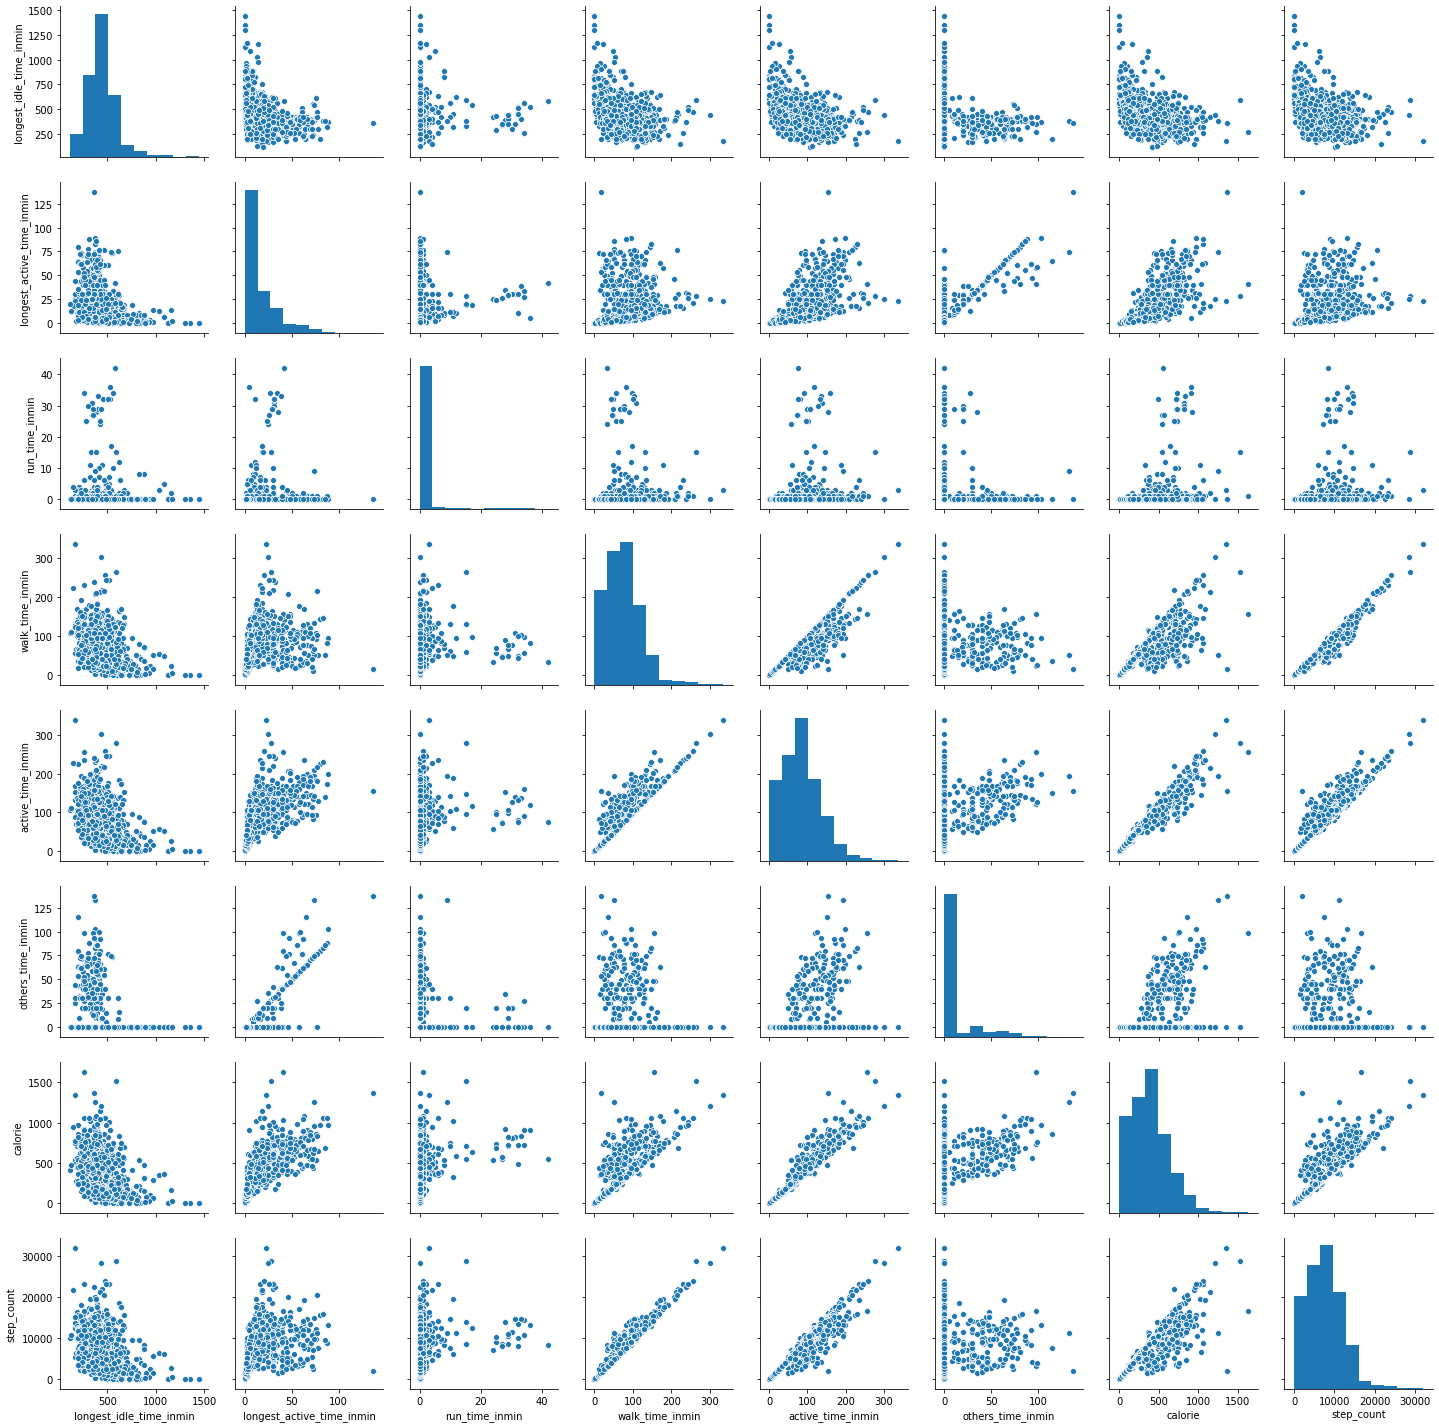

In [76]:
sns.pairplot(summary[['longest_idle_time_inmin', 'longest_active_time_inmin', 'run_time_inmin', 'walk_time_inmin','active_time_inmin', 'others_time_inmin', 'calorie', 'step_count']], hue_order=['day_name','is_weekend'])

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()


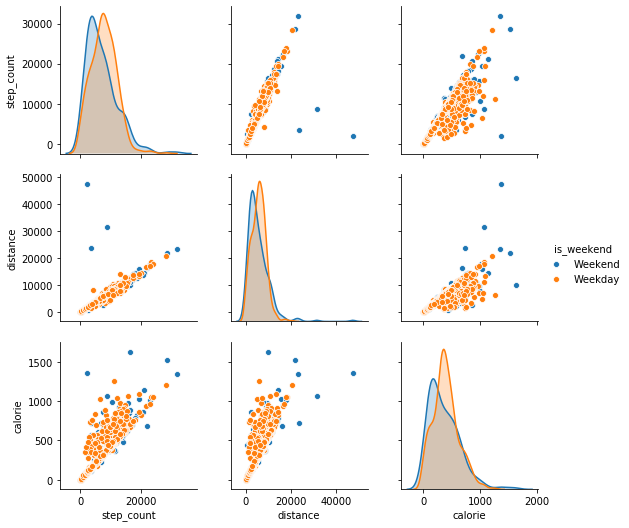

In [77]:
sns.pairplot(hue = 'is_weekend', data = summary[['step_count', 'distance', 'calorie', 'day_name', 'is_weekend']])


In [78]:
ex_full.dropna(subset=['exercise_name'], inplace=True)
ex_full.dropna(subset=['exer_distance'], inplace=True)
ex_full.reset_index(drop=True, inplace=True)

In [79]:
sleep_s_f.to_csv('sleep_final.csv')
ex_full.to_csv('exercise_final.csv')
floors_c_s_f.to_csv('floors_final.csv')
heart_r_s_f.to_csv('heart_final.csv')
step_c_s_f.to_csv('step_final.csv')
summary.to_csv('summary_final.csv')

In [80]:
# for imports with datetime values
sleep_imported = pd.read_csv('./sleep_final.csv', parse_dates=['sleep_end_time','sleep_start_time','sleep_create_time','sleep_update_time','sleep_dur'])


In [81]:
sleep_s_f1 = sleep_s_f[sleep_s_f['sleep_day_name']=='Saturday']
sleep_s_f2 = sleep_s_f[sleep_s_f['sleep_day_name']=='Sunday']
sleep_s_f3 = sleep_s_f[sleep_s_f['sleep_day_name']=='Monday']
sleep_s_f4 = sleep_s_f[sleep_s_f['sleep_day_name']=='Tuesday']
sleep_s_f5 = sleep_s_f[sleep_s_f['sleep_day_name']=='Wednesday']
sleep_s_f6 = sleep_s_f[sleep_s_f['sleep_day_name']=='Thursday']
sleep_s_f7 = sleep_s_f[sleep_s_f['sleep_day_name']=='Friday']